In [1]:
import numpy as np
from cellpose import plot as cellplot
from cellpose import utils as cellutils
import os
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual


# Pre-segmented

## First, 2d data

In [2]:
# Get location of pre-segmented data
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'img0000_seg.npy'

file_name = os.path.join(folder_name, file_name)

dat = np.load(file_name, allow_pickle=True).item()


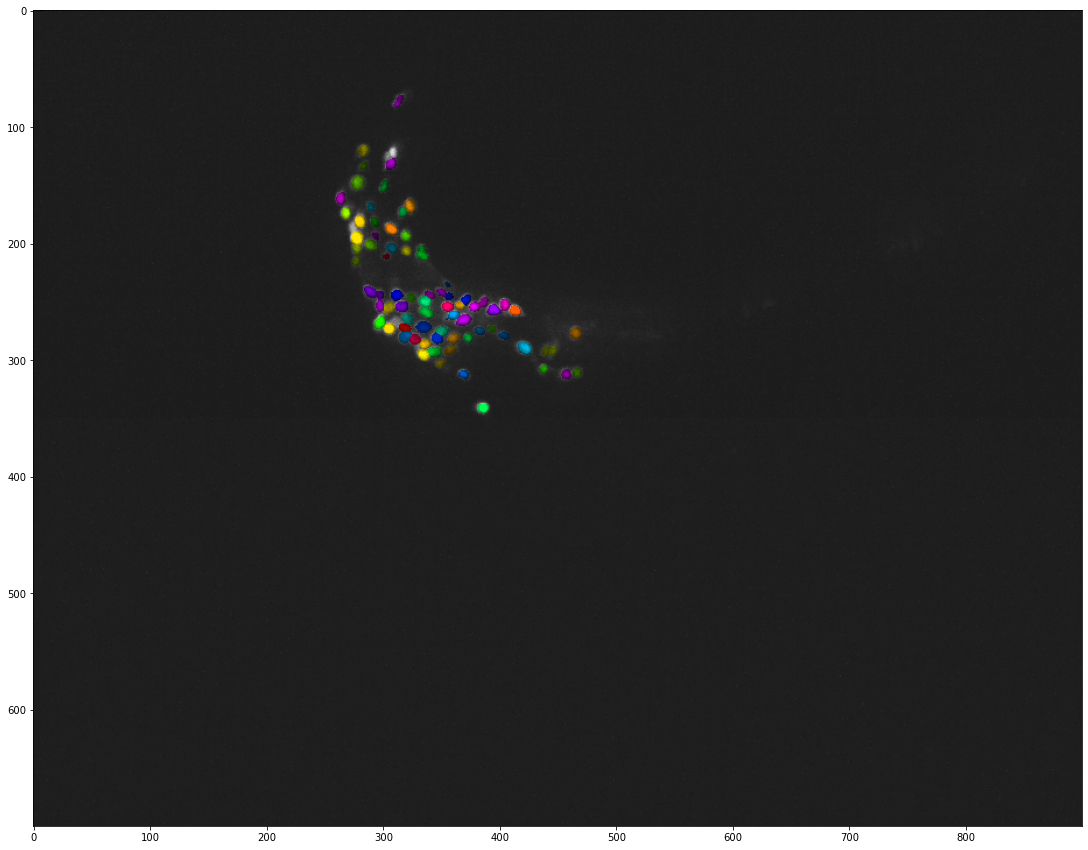

In [29]:
# plot image with masks overlaid
plt.figure(figsize=(45,15))

mask_RGB = cellpose.plot.mask_overlay(dat['img'], dat['masks'],
                        colors=np.array(dat['colors']))
plt.imshow(mask_RGB)

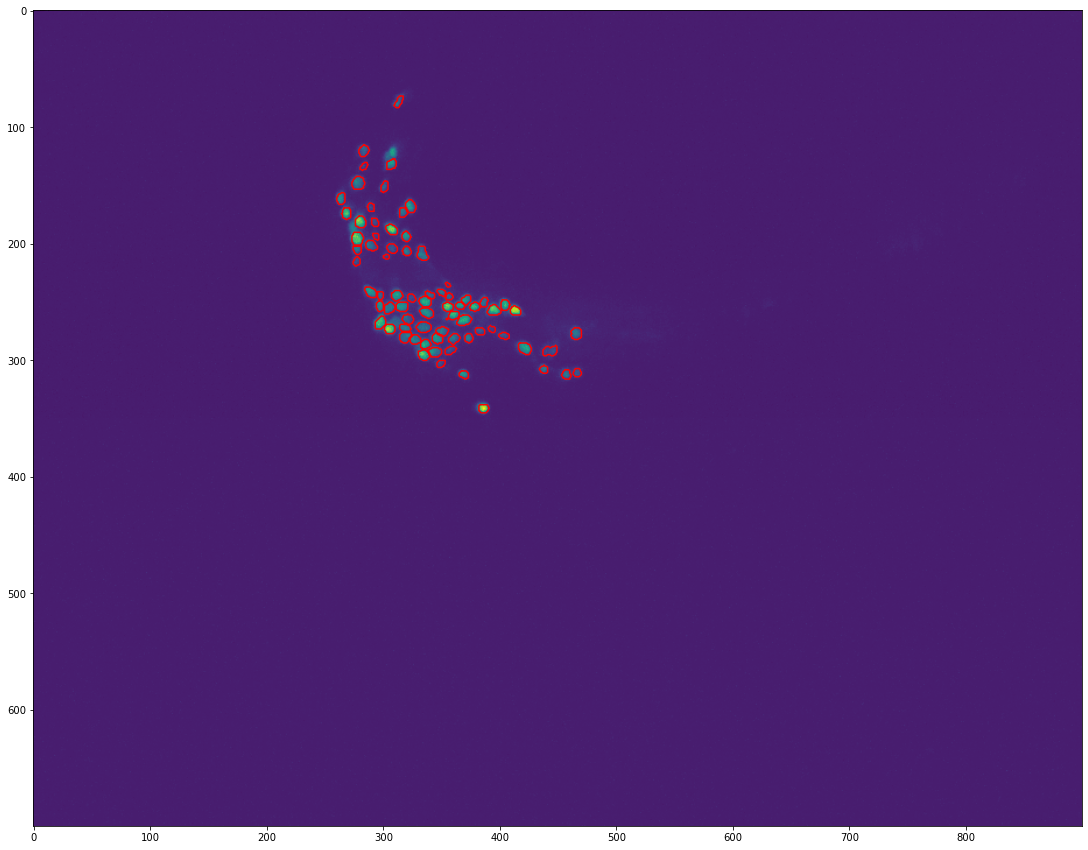

In [30]:
# plot image with outlines overlaid in red
outlines = cellpose.utils.outlines_list(dat['masks'])
plt.figure(figsize=(45,15))
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

In [25]:
dat['outlines']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

## Second, 3d data

In [20]:
# Get location of pre-segmented data
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'one_volume_seg.npy'

file_name = os.path.join(folder_name, file_name)
dat = np.load(file_name, allow_pickle=True).item()

# We also need to separately load the image
import tifffile

file_name = 'one_volume.tif'
file_name = os.path.join(folder_name, file_name)
img = tifffile.imread(file_name)

In [4]:
# plot image with masks overlaid
dat.keys()

dict_keys(['outlines', 'colors', 'masks', 'current_channel', 'filename', 'flows', 'zdraw'])

In [64]:
outlines = [cellutils.outlines_list(single_slice_mask) for single_slice_mask in dat['masks']]


In [85]:
# plot image with outlines overlaid in red
# New: WIDGET
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(i):
    fig, ax = plt.subplots(1,1,figsize=(45, 15))
#     ax = axes.ravel()
    
    plt.imshow(img[i,...])
    for o in outlines[i]:
        plt.plot(o[:,0], o[:,1], color='r')
    plt.title(f'Slice {i}')
    
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=16, description='i', max=32), Output()), _dom_classes=('widget-interact'…

## Brightness tests

In [92]:
def brightness_from_roi(img, cellpose_dat, which_neuron):
    """
    Just averages the pixels
    """
    mask = cellpose_dat['masks']==which_neuron
    brightness = np.mean(img[mask])
    
    return brightness

164.48387096774192

In [104]:
# plot image with outlines overlaid in red
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(z, which_neuron):
    fig, ax = plt.subplots(1,1,figsize=(45, 15))
#     ax = axes.ravel()
    
    plt.imshow(img[z,...])
    for o in outlines[z]:
        plt.plot(o[:,0], o[:,1], color='r')
    # An extra one for the current target
    mask = dat['masks'][z,...]==which_neuron
    nnz = np.count_nonzero(mask)
    if nnz>0:
        plt.imshow(mask)
        print(f'Found {nnz} pixels')
    else:
        print("Neuron not on this plane")
        
    b = brightness_from_roi(img, dat, which_neuron)
    
    plt.title(f'Slice {z}, Neuron {which_neuron}, Brightness {b}')
    
interact(f, z=(0,img.shape[0]-1), which_neuron=(0,200));

interactive(children=(IntSlider(value=16, description='z', max=32), IntSlider(value=100, description='which_ne…

# Redo segmentation

## First, 2d

In [78]:
from cellpose import models, io

In [12]:
# Get location of single volume to be used
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'img0000.png'

file_name = os.path.join(folder_name, file_name)

save_filename = os.path.join(folder_name, 'img0000_notebook.png')

In [6]:
model = models.Cellpose(gpu=False, model_type='nuclei')


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [11]:
# Settings
channels = [0,0] # Grayscale image
diameter = 8
img = io.imread(file_name)


In [13]:
masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels)

processing 1 image(s)
time spent: running network 36.84s; flow+mask computation 7.01
estimated masks for 1 image(s) in 43.96 sec
>>>> TOTAL TIME 43.96 sec


In [16]:
# save results so you can load in gui
io.masks_flows_to_seg(img, masks, flows, diams, save_filename, channels)

# save results as png
io.save_to_png(img, masks, flows, save_filename)

## Next, 3d

In [3]:
# Get location of single volume to be used
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'one_volume_cropped.tif'

file_name = os.path.join(folder_name, file_name)

save_filename = os.path.join(folder_name, 'one_volume_cropped_notebook.tif')

model = models.Cellpose(gpu=False, model_type='nuclei')

# Settings
channels = [0,0] # Grayscale image
diameter = 8
img = io.imread(file_name)


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [4]:
masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels, do_3D=True)

processing 1 image(s)
multi-stack tiff read in as having 28 planes 1 channels

 running YX: 28 planes of size (328, 470) 




100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:51<00:00,  3.71s/it]



 running ZY: 328 planes of size (28, 470) 




100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:53<00:00,  1.23it/s]



 running ZX: 470 planes of size (28, 328) 




100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:51<00:00,  1.14it/s]


flows computed 649.19s
dynamics computed 649.61s
masks computed 656.03s
estimated masks for 1 image(s) in 661.38 sec
>>>> TOTAL TIME 661.38 sec


## Test for a small cropped cube

In [52]:
# Use the project config file
from DLC_for_WBFM.bin.configuration_definition import *
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import _get_crop_from_ometiff_virtual
from cellpose import models
from cellpose import utils as cellutils

%load_ext autoreload
%autoreload 2


fname = 'test_project.pickle'

proj = pickle.load(open(fname, 'rb'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
print(proj)

                Field values:
                task_name: test 
                experimenter: Charlie 
                config_filename: test_project
                Which subclasses are initialized?
                datafiles: True
                preprocessing: True
                tracking: True
                traces: True



In [41]:
# Read in a small cube
which_neuron = 0
num_frames = 10

cropped_dat = _get_crop_from_ometiff_virtual(fname,
                                   which_neuron=which_neuron,
                                   num_frames=num_frames)

Cropping 7 slices, starting at 8
Full size read as (700, 900)
Page 3308/330; volume 0/10 to cropped array slice 0
Page 3309/330; volume 0/10 to cropped array slice 1
Page 3310/330; volume 0/10 to cropped array slice 2
Page 3311/330; volume 0/10 to cropped array slice 3
Page 3312/330; volume 0/10 to cropped array slice 4
Page 3313/330; volume 0/10 to cropped array slice 5
Page 3314/330; volume 0/10 to cropped array slice 6
Page 3341/330; volume 1/10 to cropped array slice 0
Page 3342/330; volume 1/10 to cropped array slice 1
Page 3343/330; volume 1/10 to cropped array slice 2
Page 3344/330; volume 1/10 to cropped array slice 3
Page 3345/330; volume 1/10 to cropped array slice 4
Page 3346/330; volume 1/10 to cropped array slice 5
Page 3347/330; volume 1/10 to cropped array slice 6
Page 3374/330; volume 2/10 to cropped array slice 0
Page 3375/330; volume 2/10 to cropped array slice 1
Page 3376/330; volume 2/10 to cropped array slice 2
Page 3377/330; volume 2/10 to cropped array slice 3
Pa

In [49]:
cropped_dat.shape
cropped_img = np.squeeze(cropped_dat[0,...])

diameter = 8
channels = [0,0]
model = models.Cellpose(gpu=False, model_type='nuclei')


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [50]:
masks2, flows2, styles2, diams2 = model.eval(cropped_img, diameter=diameter, channels=channels, do_3D=True)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]

flows computed 4.31s
dynamics computed 4.31s
masks computed 4.39s
estimated masks for 1 image(s) in 4.41 sec
>>>> TOTAL TIME 4.42 sec


In [53]:
outlines = [cellutils.outlines_list(single_slice_mask) for single_slice_mask in masks2]


In [56]:
def brightness_from_roi(img, all_masks, which_neuron):
    """
    Just averages the pixels
    """
    mask = all_masks==which_neuron
    brightness = np.mean(img[mask])
    
    return brightness

In [58]:
# plot image with outlines overlaid in red
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(z, which_neuron):
    fig, ax = plt.subplots(1,1,figsize=(45, 15))
#     ax = axes.ravel()
    
    plt.imshow(cropped_img[z,...])
    for o in outlines[z]:
        plt.plot(o[:,0], o[:,1], color='r')
    # An extra one for the current target
    mask = masks2[z,...]==which_neuron
    nnz = np.count_nonzero(mask)
    if nnz>0:
#         plt.imshow(mask)
        print(f'Found {nnz} pixels')
    else:
        print("Neuron not on this plane")
        
    b = brightness_from_roi(cropped_img, masks2, which_neuron)
    
    plt.title(f'Slice {z}, Neuron {which_neuron}, Brightness {b}')
    
interact(f, z=(0,cropped_img.shape[0]-1), which_neuron=(0,1));

interactive(children=(IntSlider(value=3, description='z', max=6), IntSlider(value=0, description='which_neuron…

## Finally, a time series of the small cubes

In [113]:
# Use the project config file
from DLC_for_WBFM.bin.configuration_definition import *
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import _get_crop_from_ometiff_virtual
from cellpose import models
from cellpose import utils as cellutils
from DLC_for_WBFM.utils.visualization.plot_context_utils import _plot_video_crop_trace
import imageio

%load_ext autoreload
%autoreload 2

fname = 'test_project.pickle'
proj = load_config(fname)
# proj = pickle.load(open(fname, 'rb'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Read in 2d video
video_reader = imageio.get_reader(proj.datafiles.red_avi_fname)
video_dat = []
for im in video_reader:
    video_dat.append(im)

In [125]:
# Read in a small cube
which_neuron = 0
num_frames = 1000

cropped_dat_red = _get_crop_from_ometiff_virtual(fname,
                                   which_neuron=which_neuron,
                                   num_frames=num_frames,
                                                use_red_channel=True)


cropped_dat_green = _get_crop_from_ometiff_virtual(fname,
                                   which_neuron=which_neuron,
                                   num_frames=num_frames,
                                                use_red_channel=False)

Cropping 7 slices, starting at 8
Full size read as (700, 900)
Page 3308/33000; volume 0/1000 to cropped array slice 0
Page 3309/33000; volume 0/1000 to cropped array slice 1
Page 3310/33000; volume 0/1000 to cropped array slice 2
Page 3311/33000; volume 0/1000 to cropped array slice 3
Page 3312/33000; volume 0/1000 to cropped array slice 4
Page 3313/33000; volume 0/1000 to cropped array slice 5
Page 3314/33000; volume 0/1000 to cropped array slice 6
Page 3341/33000; volume 1/1000 to cropped array slice 0
Page 3342/33000; volume 1/1000 to cropped array slice 1
Page 3343/33000; volume 1/1000 to cropped array slice 2
Page 3344/33000; volume 1/1000 to cropped array slice 3
Page 3345/33000; volume 1/1000 to cropped array slice 4
Page 3346/33000; volume 1/1000 to cropped array slice 5
Page 3347/33000; volume 1/1000 to cropped array slice 6
Page 3374/33000; volume 2/1000 to cropped array slice 0
Page 3375/33000; volume 2/1000 to cropped array slice 1
Page 3376/33000; volume 2/1000 to cropped 

Page 4134/33000; volume 25/1000 to cropped array slice 1
Page 4135/33000; volume 25/1000 to cropped array slice 2
Page 4136/33000; volume 25/1000 to cropped array slice 3
Page 4137/33000; volume 25/1000 to cropped array slice 4
Page 4138/33000; volume 25/1000 to cropped array slice 5
Page 4139/33000; volume 25/1000 to cropped array slice 6
Page 4166/33000; volume 26/1000 to cropped array slice 0
Page 4167/33000; volume 26/1000 to cropped array slice 1
Page 4168/33000; volume 26/1000 to cropped array slice 2
Page 4169/33000; volume 26/1000 to cropped array slice 3
Page 4170/33000; volume 26/1000 to cropped array slice 4
Page 4171/33000; volume 26/1000 to cropped array slice 5
Page 4172/33000; volume 26/1000 to cropped array slice 6
Page 4199/33000; volume 27/1000 to cropped array slice 0
Page 4200/33000; volume 27/1000 to cropped array slice 1
Page 4201/33000; volume 27/1000 to cropped array slice 2
Page 4202/33000; volume 27/1000 to cropped array slice 3
Page 4203/33000; volume 27/1000

Page 4827/33000; volume 46/1000 to cropped array slice 1
Page 4828/33000; volume 46/1000 to cropped array slice 2
Page 4829/33000; volume 46/1000 to cropped array slice 3
Page 4830/33000; volume 46/1000 to cropped array slice 4
Page 4831/33000; volume 46/1000 to cropped array slice 5
Page 4832/33000; volume 46/1000 to cropped array slice 6
Page 4859/33000; volume 47/1000 to cropped array slice 0
Page 4860/33000; volume 47/1000 to cropped array slice 1
Page 4861/33000; volume 47/1000 to cropped array slice 2
Page 4862/33000; volume 47/1000 to cropped array slice 3
Page 4863/33000; volume 47/1000 to cropped array slice 4
Page 4864/33000; volume 47/1000 to cropped array slice 5
Page 4865/33000; volume 47/1000 to cropped array slice 6
Page 4892/33000; volume 48/1000 to cropped array slice 0
Page 4893/33000; volume 48/1000 to cropped array slice 1
Page 4894/33000; volume 48/1000 to cropped array slice 2
Page 4895/33000; volume 48/1000 to cropped array slice 3
Page 4896/33000; volume 48/1000

Page 5653/33000; volume 71/1000 to cropped array slice 2
Page 5654/33000; volume 71/1000 to cropped array slice 3
Page 5655/33000; volume 71/1000 to cropped array slice 4
Page 5656/33000; volume 71/1000 to cropped array slice 5
Page 5657/33000; volume 71/1000 to cropped array slice 6
Page 5684/33000; volume 72/1000 to cropped array slice 0
Page 5685/33000; volume 72/1000 to cropped array slice 1
Page 5686/33000; volume 72/1000 to cropped array slice 2
Page 5687/33000; volume 72/1000 to cropped array slice 3
Page 5688/33000; volume 72/1000 to cropped array slice 4
Page 5689/33000; volume 72/1000 to cropped array slice 5
Page 5690/33000; volume 72/1000 to cropped array slice 6
Page 5717/33000; volume 73/1000 to cropped array slice 0
Page 5718/33000; volume 73/1000 to cropped array slice 1
Page 5719/33000; volume 73/1000 to cropped array slice 2
Page 5720/33000; volume 73/1000 to cropped array slice 3
Page 5721/33000; volume 73/1000 to cropped array slice 4
Page 5722/33000; volume 73/1000

Page 6480/33000; volume 96/1000 to cropped array slice 4
Page 6481/33000; volume 96/1000 to cropped array slice 5
Page 6482/33000; volume 96/1000 to cropped array slice 6
Page 6509/33000; volume 97/1000 to cropped array slice 0
Page 6510/33000; volume 97/1000 to cropped array slice 1
Page 6511/33000; volume 97/1000 to cropped array slice 2
Page 6512/33000; volume 97/1000 to cropped array slice 3
Page 6513/33000; volume 97/1000 to cropped array slice 4
Page 6514/33000; volume 97/1000 to cropped array slice 5
Page 6515/33000; volume 97/1000 to cropped array slice 6
Page 6542/33000; volume 98/1000 to cropped array slice 0
Page 6543/33000; volume 98/1000 to cropped array slice 1
Page 6544/33000; volume 98/1000 to cropped array slice 2
Page 6545/33000; volume 98/1000 to cropped array slice 3
Page 6546/33000; volume 98/1000 to cropped array slice 4
Page 6547/33000; volume 98/1000 to cropped array slice 5
Page 6548/33000; volume 98/1000 to cropped array slice 6
Page 6575/33000; volume 99/1000

Page 7306/33000; volume 121/1000 to cropped array slice 5
Page 7307/33000; volume 121/1000 to cropped array slice 6
Page 7334/33000; volume 122/1000 to cropped array slice 0
Page 7335/33000; volume 122/1000 to cropped array slice 1
Page 7336/33000; volume 122/1000 to cropped array slice 2
Page 7337/33000; volume 122/1000 to cropped array slice 3
Page 7338/33000; volume 122/1000 to cropped array slice 4
Page 7339/33000; volume 122/1000 to cropped array slice 5
Page 7340/33000; volume 122/1000 to cropped array slice 6
Page 7367/33000; volume 123/1000 to cropped array slice 0
Page 7368/33000; volume 123/1000 to cropped array slice 1
Page 7369/33000; volume 123/1000 to cropped array slice 2
Page 7370/33000; volume 123/1000 to cropped array slice 3
Page 7371/33000; volume 123/1000 to cropped array slice 4
Page 7372/33000; volume 123/1000 to cropped array slice 5
Page 7373/33000; volume 123/1000 to cropped array slice 6
Page 7400/33000; volume 124/1000 to cropped array slice 0
Page 7401/3300

Page 7997/33000; volume 142/1000 to cropped array slice 3
Page 7998/33000; volume 142/1000 to cropped array slice 4
Page 7999/33000; volume 142/1000 to cropped array slice 5
Page 8000/33000; volume 142/1000 to cropped array slice 6
Page 8027/33000; volume 143/1000 to cropped array slice 0
Page 8028/33000; volume 143/1000 to cropped array slice 1
Page 8029/33000; volume 143/1000 to cropped array slice 2
Page 8030/33000; volume 143/1000 to cropped array slice 3
Page 8031/33000; volume 143/1000 to cropped array slice 4
Page 8032/33000; volume 143/1000 to cropped array slice 5
Page 8033/33000; volume 143/1000 to cropped array slice 6
Page 8060/33000; volume 144/1000 to cropped array slice 0
Page 8061/33000; volume 144/1000 to cropped array slice 1
Page 8062/33000; volume 144/1000 to cropped array slice 2
Page 8063/33000; volume 144/1000 to cropped array slice 3
Page 8064/33000; volume 144/1000 to cropped array slice 4
Page 8065/33000; volume 144/1000 to cropped array slice 5
Page 8066/3300

Page 8687/33000; volume 163/1000 to cropped array slice 0
Page 8688/33000; volume 163/1000 to cropped array slice 1
Page 8689/33000; volume 163/1000 to cropped array slice 2
Page 8690/33000; volume 163/1000 to cropped array slice 3
Page 8691/33000; volume 163/1000 to cropped array slice 4
Page 8692/33000; volume 163/1000 to cropped array slice 5
Page 8693/33000; volume 163/1000 to cropped array slice 6
Page 8720/33000; volume 164/1000 to cropped array slice 0
Page 8721/33000; volume 164/1000 to cropped array slice 1
Page 8722/33000; volume 164/1000 to cropped array slice 2
Page 8723/33000; volume 164/1000 to cropped array slice 3
Page 8724/33000; volume 164/1000 to cropped array slice 4
Page 8725/33000; volume 164/1000 to cropped array slice 5
Page 8726/33000; volume 164/1000 to cropped array slice 6
Page 8753/33000; volume 165/1000 to cropped array slice 0
Page 8754/33000; volume 165/1000 to cropped array slice 1
Page 8755/33000; volume 165/1000 to cropped array slice 2
Page 8756/3300

Page 9352/33000; volume 183/1000 to cropped array slice 5
Page 9353/33000; volume 183/1000 to cropped array slice 6
Page 9380/33000; volume 184/1000 to cropped array slice 0
Page 9381/33000; volume 184/1000 to cropped array slice 1
Page 9382/33000; volume 184/1000 to cropped array slice 2
Page 9383/33000; volume 184/1000 to cropped array slice 3
Page 9384/33000; volume 184/1000 to cropped array slice 4
Page 9385/33000; volume 184/1000 to cropped array slice 5
Page 9386/33000; volume 184/1000 to cropped array slice 6
Page 9413/33000; volume 185/1000 to cropped array slice 0
Page 9414/33000; volume 185/1000 to cropped array slice 1
Page 9415/33000; volume 185/1000 to cropped array slice 2
Page 9416/33000; volume 185/1000 to cropped array slice 3
Page 9417/33000; volume 185/1000 to cropped array slice 4
Page 9418/33000; volume 185/1000 to cropped array slice 5
Page 9419/33000; volume 185/1000 to cropped array slice 6
Page 9446/33000; volume 186/1000 to cropped array slice 0
Page 9447/3300

Page 10172/33000; volume 208/1000 to cropped array slice 0
Page 10173/33000; volume 208/1000 to cropped array slice 1
Page 10174/33000; volume 208/1000 to cropped array slice 2
Page 10175/33000; volume 208/1000 to cropped array slice 3
Page 10176/33000; volume 208/1000 to cropped array slice 4
Page 10177/33000; volume 208/1000 to cropped array slice 5
Page 10178/33000; volume 208/1000 to cropped array slice 6
Page 10205/33000; volume 209/1000 to cropped array slice 0
Page 10206/33000; volume 209/1000 to cropped array slice 1
Page 10207/33000; volume 209/1000 to cropped array slice 2
Page 10208/33000; volume 209/1000 to cropped array slice 3
Page 10209/33000; volume 209/1000 to cropped array slice 4
Page 10210/33000; volume 209/1000 to cropped array slice 5
Page 10211/33000; volume 209/1000 to cropped array slice 6
Page 10238/33000; volume 210/1000 to cropped array slice 0
Page 10239/33000; volume 210/1000 to cropped array slice 1
Page 10240/33000; volume 210/1000 to cropped array slice

Page 10968/33000; volume 232/1000 to cropped array slice 4
Page 10969/33000; volume 232/1000 to cropped array slice 5
Page 10970/33000; volume 232/1000 to cropped array slice 6
Page 10997/33000; volume 233/1000 to cropped array slice 0
Page 10998/33000; volume 233/1000 to cropped array slice 1
Page 10999/33000; volume 233/1000 to cropped array slice 2
Page 11000/33000; volume 233/1000 to cropped array slice 3
Page 11001/33000; volume 233/1000 to cropped array slice 4
Page 11002/33000; volume 233/1000 to cropped array slice 5
Page 11003/33000; volume 233/1000 to cropped array slice 6
Page 11030/33000; volume 234/1000 to cropped array slice 0
Page 11031/33000; volume 234/1000 to cropped array slice 1
Page 11032/33000; volume 234/1000 to cropped array slice 2
Page 11033/33000; volume 234/1000 to cropped array slice 3
Page 11034/33000; volume 234/1000 to cropped array slice 4
Page 11035/33000; volume 234/1000 to cropped array slice 5
Page 11036/33000; volume 234/1000 to cropped array slice

Page 11659/33000; volume 253/1000 to cropped array slice 2
Page 11660/33000; volume 253/1000 to cropped array slice 3
Page 11661/33000; volume 253/1000 to cropped array slice 4
Page 11662/33000; volume 253/1000 to cropped array slice 5
Page 11663/33000; volume 253/1000 to cropped array slice 6
Page 11690/33000; volume 254/1000 to cropped array slice 0
Page 11691/33000; volume 254/1000 to cropped array slice 1
Page 11692/33000; volume 254/1000 to cropped array slice 2
Page 11693/33000; volume 254/1000 to cropped array slice 3
Page 11694/33000; volume 254/1000 to cropped array slice 4
Page 11695/33000; volume 254/1000 to cropped array slice 5
Page 11696/33000; volume 254/1000 to cropped array slice 6
Page 11723/33000; volume 255/1000 to cropped array slice 0
Page 11724/33000; volume 255/1000 to cropped array slice 1
Page 11725/33000; volume 255/1000 to cropped array slice 2
Page 11726/33000; volume 255/1000 to cropped array slice 3
Page 11727/33000; volume 255/1000 to cropped array slice

Page 12322/33000; volume 273/1000 to cropped array slice 5
Page 12323/33000; volume 273/1000 to cropped array slice 6
Page 12350/33000; volume 274/1000 to cropped array slice 0
Page 12351/33000; volume 274/1000 to cropped array slice 1
Page 12352/33000; volume 274/1000 to cropped array slice 2
Page 12353/33000; volume 274/1000 to cropped array slice 3
Page 12354/33000; volume 274/1000 to cropped array slice 4
Page 12355/33000; volume 274/1000 to cropped array slice 5
Page 12356/33000; volume 274/1000 to cropped array slice 6
Page 12383/33000; volume 275/1000 to cropped array slice 0
Page 12384/33000; volume 275/1000 to cropped array slice 1
Page 12385/33000; volume 275/1000 to cropped array slice 2
Page 12386/33000; volume 275/1000 to cropped array slice 3
Page 12387/33000; volume 275/1000 to cropped array slice 4
Page 12388/33000; volume 275/1000 to cropped array slice 5
Page 12389/33000; volume 275/1000 to cropped array slice 6
Page 12416/33000; volume 276/1000 to cropped array slice

Page 13013/33000; volume 294/1000 to cropped array slice 3
Page 13014/33000; volume 294/1000 to cropped array slice 4
Page 13015/33000; volume 294/1000 to cropped array slice 5
Page 13016/33000; volume 294/1000 to cropped array slice 6
Page 13043/33000; volume 295/1000 to cropped array slice 0
Page 13044/33000; volume 295/1000 to cropped array slice 1
Page 13045/33000; volume 295/1000 to cropped array slice 2
Page 13046/33000; volume 295/1000 to cropped array slice 3
Page 13047/33000; volume 295/1000 to cropped array slice 4
Page 13048/33000; volume 295/1000 to cropped array slice 5
Page 13049/33000; volume 295/1000 to cropped array slice 6
Page 13076/33000; volume 296/1000 to cropped array slice 0
Page 13077/33000; volume 296/1000 to cropped array slice 1
Page 13078/33000; volume 296/1000 to cropped array slice 2
Page 13079/33000; volume 296/1000 to cropped array slice 3
Page 13080/33000; volume 296/1000 to cropped array slice 4
Page 13081/33000; volume 296/1000 to cropped array slice

Page 13676/33000; volume 314/1000 to cropped array slice 6
Page 13703/33000; volume 315/1000 to cropped array slice 0
Page 13704/33000; volume 315/1000 to cropped array slice 1
Page 13705/33000; volume 315/1000 to cropped array slice 2
Page 13706/33000; volume 315/1000 to cropped array slice 3
Page 13707/33000; volume 315/1000 to cropped array slice 4
Page 13708/33000; volume 315/1000 to cropped array slice 5
Page 13709/33000; volume 315/1000 to cropped array slice 6
Page 13736/33000; volume 316/1000 to cropped array slice 0
Page 13737/33000; volume 316/1000 to cropped array slice 1
Page 13738/33000; volume 316/1000 to cropped array slice 2
Page 13739/33000; volume 316/1000 to cropped array slice 3
Page 13740/33000; volume 316/1000 to cropped array slice 4
Page 13741/33000; volume 316/1000 to cropped array slice 5
Page 13742/33000; volume 316/1000 to cropped array slice 6
Page 13769/33000; volume 317/1000 to cropped array slice 0
Page 13770/33000; volume 317/1000 to cropped array slice

Page 14336/33000; volume 334/1000 to cropped array slice 6
Page 14363/33000; volume 335/1000 to cropped array slice 0
Page 14364/33000; volume 335/1000 to cropped array slice 1
Page 14365/33000; volume 335/1000 to cropped array slice 2
Page 14366/33000; volume 335/1000 to cropped array slice 3
Page 14367/33000; volume 335/1000 to cropped array slice 4
Page 14368/33000; volume 335/1000 to cropped array slice 5
Page 14369/33000; volume 335/1000 to cropped array slice 6
Page 14396/33000; volume 336/1000 to cropped array slice 0
Page 14397/33000; volume 336/1000 to cropped array slice 1
Page 14398/33000; volume 336/1000 to cropped array slice 2
Page 14399/33000; volume 336/1000 to cropped array slice 3
Page 14400/33000; volume 336/1000 to cropped array slice 4
Page 14401/33000; volume 336/1000 to cropped array slice 5
Page 14402/33000; volume 336/1000 to cropped array slice 6
Page 14429/33000; volume 337/1000 to cropped array slice 0
Page 14430/33000; volume 337/1000 to cropped array slice

Page 15025/33000; volume 355/1000 to cropped array slice 2
Page 15026/33000; volume 355/1000 to cropped array slice 3
Page 15027/33000; volume 355/1000 to cropped array slice 4
Page 15028/33000; volume 355/1000 to cropped array slice 5
Page 15029/33000; volume 355/1000 to cropped array slice 6
Page 15056/33000; volume 356/1000 to cropped array slice 0
Page 15057/33000; volume 356/1000 to cropped array slice 1
Page 15058/33000; volume 356/1000 to cropped array slice 2
Page 15059/33000; volume 356/1000 to cropped array slice 3
Page 15060/33000; volume 356/1000 to cropped array slice 4
Page 15061/33000; volume 356/1000 to cropped array slice 5
Page 15062/33000; volume 356/1000 to cropped array slice 6
Page 15089/33000; volume 357/1000 to cropped array slice 0
Page 15090/33000; volume 357/1000 to cropped array slice 1
Page 15091/33000; volume 357/1000 to cropped array slice 2
Page 15092/33000; volume 357/1000 to cropped array slice 3
Page 15093/33000; volume 357/1000 to cropped array slice

Page 15687/33000; volume 375/1000 to cropped array slice 4
Page 15688/33000; volume 375/1000 to cropped array slice 5
Page 15689/33000; volume 375/1000 to cropped array slice 6
Page 15716/33000; volume 376/1000 to cropped array slice 0
Page 15717/33000; volume 376/1000 to cropped array slice 1
Page 15718/33000; volume 376/1000 to cropped array slice 2
Page 15719/33000; volume 376/1000 to cropped array slice 3
Page 15720/33000; volume 376/1000 to cropped array slice 4
Page 15721/33000; volume 376/1000 to cropped array slice 5
Page 15722/33000; volume 376/1000 to cropped array slice 6
Page 15749/33000; volume 377/1000 to cropped array slice 0
Page 15750/33000; volume 377/1000 to cropped array slice 1
Page 15751/33000; volume 377/1000 to cropped array slice 2
Page 15752/33000; volume 377/1000 to cropped array slice 3
Page 15753/33000; volume 377/1000 to cropped array slice 4
Page 15754/33000; volume 377/1000 to cropped array slice 5
Page 15755/33000; volume 377/1000 to cropped array slice

Page 16376/33000; volume 396/1000 to cropped array slice 0
Page 16377/33000; volume 396/1000 to cropped array slice 1
Page 16378/33000; volume 396/1000 to cropped array slice 2
Page 16379/33000; volume 396/1000 to cropped array slice 3
Page 16380/33000; volume 396/1000 to cropped array slice 4
Page 16381/33000; volume 396/1000 to cropped array slice 5
Page 16382/33000; volume 396/1000 to cropped array slice 6
Page 16409/33000; volume 397/1000 to cropped array slice 0
Page 16410/33000; volume 397/1000 to cropped array slice 1
Page 16411/33000; volume 397/1000 to cropped array slice 2
Page 16412/33000; volume 397/1000 to cropped array slice 3
Page 16413/33000; volume 397/1000 to cropped array slice 4
Page 16414/33000; volume 397/1000 to cropped array slice 5
Page 16415/33000; volume 397/1000 to cropped array slice 6
Page 16442/33000; volume 398/1000 to cropped array slice 0
Page 16443/33000; volume 398/1000 to cropped array slice 1
Page 16444/33000; volume 398/1000 to cropped array slice

Page 17039/33000; volume 416/1000 to cropped array slice 3
Page 17040/33000; volume 416/1000 to cropped array slice 4
Page 17041/33000; volume 416/1000 to cropped array slice 5
Page 17042/33000; volume 416/1000 to cropped array slice 6
Page 17069/33000; volume 417/1000 to cropped array slice 0
Page 17070/33000; volume 417/1000 to cropped array slice 1
Page 17071/33000; volume 417/1000 to cropped array slice 2
Page 17072/33000; volume 417/1000 to cropped array slice 3
Page 17073/33000; volume 417/1000 to cropped array slice 4
Page 17074/33000; volume 417/1000 to cropped array slice 5
Page 17075/33000; volume 417/1000 to cropped array slice 6
Page 17102/33000; volume 418/1000 to cropped array slice 0
Page 17103/33000; volume 418/1000 to cropped array slice 1
Page 17104/33000; volume 418/1000 to cropped array slice 2
Page 17105/33000; volume 418/1000 to cropped array slice 3
Page 17106/33000; volume 418/1000 to cropped array slice 4
Page 17107/33000; volume 418/1000 to cropped array slice

Page 17732/33000; volume 437/1000 to cropped array slice 3
Page 17733/33000; volume 437/1000 to cropped array slice 4
Page 17734/33000; volume 437/1000 to cropped array slice 5
Page 17735/33000; volume 437/1000 to cropped array slice 6
Page 17762/33000; volume 438/1000 to cropped array slice 0
Page 17763/33000; volume 438/1000 to cropped array slice 1
Page 17764/33000; volume 438/1000 to cropped array slice 2
Page 17765/33000; volume 438/1000 to cropped array slice 3
Page 17766/33000; volume 438/1000 to cropped array slice 4
Page 17767/33000; volume 438/1000 to cropped array slice 5
Page 17768/33000; volume 438/1000 to cropped array slice 6
Page 17795/33000; volume 439/1000 to cropped array slice 0
Page 17796/33000; volume 439/1000 to cropped array slice 1
Page 17797/33000; volume 439/1000 to cropped array slice 2
Page 17798/33000; volume 439/1000 to cropped array slice 3
Page 17799/33000; volume 439/1000 to cropped array slice 4
Page 17800/33000; volume 439/1000 to cropped array slice

Page 18394/33000; volume 457/1000 to cropped array slice 5
Page 18395/33000; volume 457/1000 to cropped array slice 6
Page 18422/33000; volume 458/1000 to cropped array slice 0
Page 18423/33000; volume 458/1000 to cropped array slice 1
Page 18424/33000; volume 458/1000 to cropped array slice 2
Page 18425/33000; volume 458/1000 to cropped array slice 3
Page 18426/33000; volume 458/1000 to cropped array slice 4
Page 18427/33000; volume 458/1000 to cropped array slice 5
Page 18428/33000; volume 458/1000 to cropped array slice 6
Page 18455/33000; volume 459/1000 to cropped array slice 0
Page 18456/33000; volume 459/1000 to cropped array slice 1
Page 18457/33000; volume 459/1000 to cropped array slice 2
Page 18458/33000; volume 459/1000 to cropped array slice 3
Page 18459/33000; volume 459/1000 to cropped array slice 4
Page 18460/33000; volume 459/1000 to cropped array slice 5
Page 18461/33000; volume 459/1000 to cropped array slice 6
Page 18488/33000; volume 460/1000 to cropped array slice

Page 19082/33000; volume 478/1000 to cropped array slice 0
Page 19083/33000; volume 478/1000 to cropped array slice 1
Page 19084/33000; volume 478/1000 to cropped array slice 2
Page 19085/33000; volume 478/1000 to cropped array slice 3
Page 19086/33000; volume 478/1000 to cropped array slice 4
Page 19087/33000; volume 478/1000 to cropped array slice 5
Page 19088/33000; volume 478/1000 to cropped array slice 6
Page 19115/33000; volume 479/1000 to cropped array slice 0
Page 19116/33000; volume 479/1000 to cropped array slice 1
Page 19117/33000; volume 479/1000 to cropped array slice 2
Page 19118/33000; volume 479/1000 to cropped array slice 3
Page 19119/33000; volume 479/1000 to cropped array slice 4
Page 19120/33000; volume 479/1000 to cropped array slice 5
Page 19121/33000; volume 479/1000 to cropped array slice 6
Page 19148/33000; volume 480/1000 to cropped array slice 0
Page 19149/33000; volume 480/1000 to cropped array slice 1
Page 19150/33000; volume 480/1000 to cropped array slice

Page 19845/33000; volume 501/1000 to cropped array slice 4
Page 19846/33000; volume 501/1000 to cropped array slice 5
Page 19847/33000; volume 501/1000 to cropped array slice 6
Page 19874/33000; volume 502/1000 to cropped array slice 0
Page 19875/33000; volume 502/1000 to cropped array slice 1
Page 19876/33000; volume 502/1000 to cropped array slice 2
Page 19877/33000; volume 502/1000 to cropped array slice 3
Page 19878/33000; volume 502/1000 to cropped array slice 4
Page 19879/33000; volume 502/1000 to cropped array slice 5
Page 19880/33000; volume 502/1000 to cropped array slice 6
Page 19907/33000; volume 503/1000 to cropped array slice 0
Page 19908/33000; volume 503/1000 to cropped array slice 1
Page 19909/33000; volume 503/1000 to cropped array slice 2
Page 19910/33000; volume 503/1000 to cropped array slice 3
Page 19911/33000; volume 503/1000 to cropped array slice 4
Page 19912/33000; volume 503/1000 to cropped array slice 5
Page 19913/33000; volume 503/1000 to cropped array slice

Page 20668/33000; volume 526/1000 to cropped array slice 2
Page 20669/33000; volume 526/1000 to cropped array slice 3
Page 20670/33000; volume 526/1000 to cropped array slice 4
Page 20671/33000; volume 526/1000 to cropped array slice 5
Page 20672/33000; volume 526/1000 to cropped array slice 6
Page 20699/33000; volume 527/1000 to cropped array slice 0
Page 20700/33000; volume 527/1000 to cropped array slice 1
Page 20701/33000; volume 527/1000 to cropped array slice 2
Page 20702/33000; volume 527/1000 to cropped array slice 3
Page 20703/33000; volume 527/1000 to cropped array slice 4
Page 20704/33000; volume 527/1000 to cropped array slice 5
Page 20705/33000; volume 527/1000 to cropped array slice 6
Page 20732/33000; volume 528/1000 to cropped array slice 0
Page 20733/33000; volume 528/1000 to cropped array slice 1
Page 20734/33000; volume 528/1000 to cropped array slice 2
Page 20735/33000; volume 528/1000 to cropped array slice 3
Page 20736/33000; volume 528/1000 to cropped array slice

Page 21425/33000; volume 549/1000 to cropped array slice 0
Page 21426/33000; volume 549/1000 to cropped array slice 1
Page 21427/33000; volume 549/1000 to cropped array slice 2
Page 21428/33000; volume 549/1000 to cropped array slice 3
Page 21429/33000; volume 549/1000 to cropped array slice 4
Page 21430/33000; volume 549/1000 to cropped array slice 5
Page 21431/33000; volume 549/1000 to cropped array slice 6
Page 21458/33000; volume 550/1000 to cropped array slice 0
Page 21459/33000; volume 550/1000 to cropped array slice 1
Page 21460/33000; volume 550/1000 to cropped array slice 2
Page 21461/33000; volume 550/1000 to cropped array slice 3
Page 21462/33000; volume 550/1000 to cropped array slice 4
Page 21463/33000; volume 550/1000 to cropped array slice 5
Page 21464/33000; volume 550/1000 to cropped array slice 6
Page 21491/33000; volume 551/1000 to cropped array slice 0
Page 21492/33000; volume 551/1000 to cropped array slice 1
Page 21493/33000; volume 551/1000 to cropped array slice

Page 22185/33000; volume 572/1000 to cropped array slice 1
Page 22186/33000; volume 572/1000 to cropped array slice 2
Page 22187/33000; volume 572/1000 to cropped array slice 3
Page 22188/33000; volume 572/1000 to cropped array slice 4
Page 22189/33000; volume 572/1000 to cropped array slice 5
Page 22190/33000; volume 572/1000 to cropped array slice 6
Page 22217/33000; volume 573/1000 to cropped array slice 0
Page 22218/33000; volume 573/1000 to cropped array slice 1
Page 22219/33000; volume 573/1000 to cropped array slice 2
Page 22220/33000; volume 573/1000 to cropped array slice 3
Page 22221/33000; volume 573/1000 to cropped array slice 4
Page 22222/33000; volume 573/1000 to cropped array slice 5
Page 22223/33000; volume 573/1000 to cropped array slice 6
Page 22250/33000; volume 574/1000 to cropped array slice 0
Page 22251/33000; volume 574/1000 to cropped array slice 1
Page 22252/33000; volume 574/1000 to cropped array slice 2
Page 22253/33000; volume 574/1000 to cropped array slice

Page 22913/33000; volume 594/1000 to cropped array slice 3
Page 22914/33000; volume 594/1000 to cropped array slice 4
Page 22915/33000; volume 594/1000 to cropped array slice 5
Page 22916/33000; volume 594/1000 to cropped array slice 6
Page 22943/33000; volume 595/1000 to cropped array slice 0
Page 22944/33000; volume 595/1000 to cropped array slice 1
Page 22945/33000; volume 595/1000 to cropped array slice 2
Page 22946/33000; volume 595/1000 to cropped array slice 3
Page 22947/33000; volume 595/1000 to cropped array slice 4
Page 22948/33000; volume 595/1000 to cropped array slice 5
Page 22949/33000; volume 595/1000 to cropped array slice 6
Page 22976/33000; volume 596/1000 to cropped array slice 0
Page 22977/33000; volume 596/1000 to cropped array slice 1
Page 22978/33000; volume 596/1000 to cropped array slice 2
Page 22979/33000; volume 596/1000 to cropped array slice 3
Page 22980/33000; volume 596/1000 to cropped array slice 4
Page 22981/33000; volume 596/1000 to cropped array slice

Page 23705/33000; volume 618/1000 to cropped array slice 3
Page 23706/33000; volume 618/1000 to cropped array slice 4
Page 23707/33000; volume 618/1000 to cropped array slice 5
Page 23708/33000; volume 618/1000 to cropped array slice 6
Page 23735/33000; volume 619/1000 to cropped array slice 0
Page 23736/33000; volume 619/1000 to cropped array slice 1
Page 23737/33000; volume 619/1000 to cropped array slice 2
Page 23738/33000; volume 619/1000 to cropped array slice 3
Page 23739/33000; volume 619/1000 to cropped array slice 4
Page 23740/33000; volume 619/1000 to cropped array slice 5
Page 23741/33000; volume 619/1000 to cropped array slice 6
Page 23768/33000; volume 620/1000 to cropped array slice 0
Page 23769/33000; volume 620/1000 to cropped array slice 1
Page 23770/33000; volume 620/1000 to cropped array slice 2
Page 23771/33000; volume 620/1000 to cropped array slice 3
Page 23772/33000; volume 620/1000 to cropped array slice 4
Page 23773/33000; volume 620/1000 to cropped array slice

Page 24500/33000; volume 642/1000 to cropped array slice 6
Page 24527/33000; volume 643/1000 to cropped array slice 0
Page 24528/33000; volume 643/1000 to cropped array slice 1
Page 24529/33000; volume 643/1000 to cropped array slice 2
Page 24530/33000; volume 643/1000 to cropped array slice 3
Page 24531/33000; volume 643/1000 to cropped array slice 4
Page 24532/33000; volume 643/1000 to cropped array slice 5
Page 24533/33000; volume 643/1000 to cropped array slice 6
Page 24560/33000; volume 644/1000 to cropped array slice 0
Page 24561/33000; volume 644/1000 to cropped array slice 1
Page 24562/33000; volume 644/1000 to cropped array slice 2
Page 24563/33000; volume 644/1000 to cropped array slice 3
Page 24564/33000; volume 644/1000 to cropped array slice 4
Page 24565/33000; volume 644/1000 to cropped array slice 5
Page 24566/33000; volume 644/1000 to cropped array slice 6
Page 24593/33000; volume 645/1000 to cropped array slice 0
Page 24594/33000; volume 645/1000 to cropped array slice

Page 25292/33000; volume 666/1000 to cropped array slice 6
Page 25319/33000; volume 667/1000 to cropped array slice 0
Page 25320/33000; volume 667/1000 to cropped array slice 1
Page 25321/33000; volume 667/1000 to cropped array slice 2
Page 25322/33000; volume 667/1000 to cropped array slice 3
Page 25323/33000; volume 667/1000 to cropped array slice 4
Page 25324/33000; volume 667/1000 to cropped array slice 5
Page 25325/33000; volume 667/1000 to cropped array slice 6
Page 25352/33000; volume 668/1000 to cropped array slice 0
Page 25353/33000; volume 668/1000 to cropped array slice 1
Page 25354/33000; volume 668/1000 to cropped array slice 2
Page 25355/33000; volume 668/1000 to cropped array slice 3
Page 25356/33000; volume 668/1000 to cropped array slice 4
Page 25357/33000; volume 668/1000 to cropped array slice 5
Page 25358/33000; volume 668/1000 to cropped array slice 6
Page 25385/33000; volume 669/1000 to cropped array slice 0
Page 25386/33000; volume 669/1000 to cropped array slice

Page 25951/33000; volume 686/1000 to cropped array slice 5
Page 25952/33000; volume 686/1000 to cropped array slice 6
Page 25979/33000; volume 687/1000 to cropped array slice 0
Page 25980/33000; volume 687/1000 to cropped array slice 1
Page 25981/33000; volume 687/1000 to cropped array slice 2
Page 25982/33000; volume 687/1000 to cropped array slice 3
Page 25983/33000; volume 687/1000 to cropped array slice 4
Page 25984/33000; volume 687/1000 to cropped array slice 5
Page 25985/33000; volume 687/1000 to cropped array slice 6
Page 26012/33000; volume 688/1000 to cropped array slice 0
Page 26013/33000; volume 688/1000 to cropped array slice 1
Page 26014/33000; volume 688/1000 to cropped array slice 2
Page 26015/33000; volume 688/1000 to cropped array slice 3
Page 26016/33000; volume 688/1000 to cropped array slice 4
Page 26017/33000; volume 688/1000 to cropped array slice 5
Page 26018/33000; volume 688/1000 to cropped array slice 6
Page 26045/33000; volume 689/1000 to cropped array slice

Page 26641/33000; volume 707/1000 to cropped array slice 2
Page 26642/33000; volume 707/1000 to cropped array slice 3
Page 26643/33000; volume 707/1000 to cropped array slice 4
Page 26644/33000; volume 707/1000 to cropped array slice 5
Page 26645/33000; volume 707/1000 to cropped array slice 6
Page 26672/33000; volume 708/1000 to cropped array slice 0
Page 26673/33000; volume 708/1000 to cropped array slice 1
Page 26674/33000; volume 708/1000 to cropped array slice 2
Page 26675/33000; volume 708/1000 to cropped array slice 3
Page 26676/33000; volume 708/1000 to cropped array slice 4
Page 26677/33000; volume 708/1000 to cropped array slice 5
Page 26678/33000; volume 708/1000 to cropped array slice 6
Page 26705/33000; volume 709/1000 to cropped array slice 0
Page 26706/33000; volume 709/1000 to cropped array slice 1
Page 26707/33000; volume 709/1000 to cropped array slice 2
Page 26708/33000; volume 709/1000 to cropped array slice 3
Page 26709/33000; volume 709/1000 to cropped array slice

Page 27332/33000; volume 728/1000 to cropped array slice 0
Page 27333/33000; volume 728/1000 to cropped array slice 1
Page 27334/33000; volume 728/1000 to cropped array slice 2
Page 27335/33000; volume 728/1000 to cropped array slice 3
Page 27336/33000; volume 728/1000 to cropped array slice 4
Page 27337/33000; volume 728/1000 to cropped array slice 5
Page 27338/33000; volume 728/1000 to cropped array slice 6
Page 27365/33000; volume 729/1000 to cropped array slice 0
Page 27366/33000; volume 729/1000 to cropped array slice 1
Page 27367/33000; volume 729/1000 to cropped array slice 2
Page 27368/33000; volume 729/1000 to cropped array slice 3
Page 27369/33000; volume 729/1000 to cropped array slice 4
Page 27370/33000; volume 729/1000 to cropped array slice 5
Page 27371/33000; volume 729/1000 to cropped array slice 6
Page 27398/33000; volume 730/1000 to cropped array slice 0
Page 27399/33000; volume 730/1000 to cropped array slice 1
Page 27400/33000; volume 730/1000 to cropped array slice

Page 27995/33000; volume 748/1000 to cropped array slice 3
Page 27996/33000; volume 748/1000 to cropped array slice 4
Page 27997/33000; volume 748/1000 to cropped array slice 5
Page 27998/33000; volume 748/1000 to cropped array slice 6
Page 28025/33000; volume 749/1000 to cropped array slice 0
Page 28026/33000; volume 749/1000 to cropped array slice 1
Page 28027/33000; volume 749/1000 to cropped array slice 2
Page 28028/33000; volume 749/1000 to cropped array slice 3
Page 28029/33000; volume 749/1000 to cropped array slice 4
Page 28030/33000; volume 749/1000 to cropped array slice 5
Page 28031/33000; volume 749/1000 to cropped array slice 6
Page 28058/33000; volume 750/1000 to cropped array slice 0
Page 28059/33000; volume 750/1000 to cropped array slice 1
Page 28060/33000; volume 750/1000 to cropped array slice 2
Page 28061/33000; volume 750/1000 to cropped array slice 3
Page 28062/33000; volume 750/1000 to cropped array slice 4
Page 28063/33000; volume 750/1000 to cropped array slice

Page 28658/33000; volume 768/1000 to cropped array slice 6
Page 28685/33000; volume 769/1000 to cropped array slice 0
Page 28686/33000; volume 769/1000 to cropped array slice 1
Page 28687/33000; volume 769/1000 to cropped array slice 2
Page 28688/33000; volume 769/1000 to cropped array slice 3
Page 28689/33000; volume 769/1000 to cropped array slice 4
Page 28690/33000; volume 769/1000 to cropped array slice 5
Page 28691/33000; volume 769/1000 to cropped array slice 6
Page 28718/33000; volume 770/1000 to cropped array slice 0
Page 28719/33000; volume 770/1000 to cropped array slice 1
Page 28720/33000; volume 770/1000 to cropped array slice 2
Page 28721/33000; volume 770/1000 to cropped array slice 3
Page 28722/33000; volume 770/1000 to cropped array slice 4
Page 28723/33000; volume 770/1000 to cropped array slice 5
Page 28724/33000; volume 770/1000 to cropped array slice 6
Page 28751/33000; volume 771/1000 to cropped array slice 0
Page 28752/33000; volume 771/1000 to cropped array slice

Page 29346/33000; volume 789/1000 to cropped array slice 1
Page 29347/33000; volume 789/1000 to cropped array slice 2
Page 29348/33000; volume 789/1000 to cropped array slice 3
Page 29349/33000; volume 789/1000 to cropped array slice 4
Page 29350/33000; volume 789/1000 to cropped array slice 5
Page 29351/33000; volume 789/1000 to cropped array slice 6
Page 29378/33000; volume 790/1000 to cropped array slice 0
Page 29379/33000; volume 790/1000 to cropped array slice 1
Page 29380/33000; volume 790/1000 to cropped array slice 2
Page 29381/33000; volume 790/1000 to cropped array slice 3
Page 29382/33000; volume 790/1000 to cropped array slice 4
Page 29383/33000; volume 790/1000 to cropped array slice 5
Page 29384/33000; volume 790/1000 to cropped array slice 6
Page 29411/33000; volume 791/1000 to cropped array slice 0
Page 29412/33000; volume 791/1000 to cropped array slice 1
Page 29413/33000; volume 791/1000 to cropped array slice 2
Page 29414/33000; volume 791/1000 to cropped array slice

Page 30170/33000; volume 814/1000 to cropped array slice 0
Page 30171/33000; volume 814/1000 to cropped array slice 1
Page 30172/33000; volume 814/1000 to cropped array slice 2
Page 30173/33000; volume 814/1000 to cropped array slice 3
Page 30174/33000; volume 814/1000 to cropped array slice 4
Page 30175/33000; volume 814/1000 to cropped array slice 5
Page 30176/33000; volume 814/1000 to cropped array slice 6
Page 30203/33000; volume 815/1000 to cropped array slice 0
Page 30204/33000; volume 815/1000 to cropped array slice 1
Page 30205/33000; volume 815/1000 to cropped array slice 2
Page 30206/33000; volume 815/1000 to cropped array slice 3
Page 30207/33000; volume 815/1000 to cropped array slice 4
Page 30208/33000; volume 815/1000 to cropped array slice 5
Page 30209/33000; volume 815/1000 to cropped array slice 6
Page 30236/33000; volume 816/1000 to cropped array slice 0
Page 30237/33000; volume 816/1000 to cropped array slice 1
Page 30238/33000; volume 816/1000 to cropped array slice

Page 30830/33000; volume 834/1000 to cropped array slice 0
Page 30831/33000; volume 834/1000 to cropped array slice 1
Page 30832/33000; volume 834/1000 to cropped array slice 2
Page 30833/33000; volume 834/1000 to cropped array slice 3
Page 30834/33000; volume 834/1000 to cropped array slice 4
Page 30835/33000; volume 834/1000 to cropped array slice 5
Page 30836/33000; volume 834/1000 to cropped array slice 6
Page 30863/33000; volume 835/1000 to cropped array slice 0
Page 30864/33000; volume 835/1000 to cropped array slice 1
Page 30865/33000; volume 835/1000 to cropped array slice 2
Page 30866/33000; volume 835/1000 to cropped array slice 3
Page 30867/33000; volume 835/1000 to cropped array slice 4
Page 30868/33000; volume 835/1000 to cropped array slice 5
Page 30869/33000; volume 835/1000 to cropped array slice 6
Page 30896/33000; volume 836/1000 to cropped array slice 0
Page 30897/33000; volume 836/1000 to cropped array slice 1
Page 30898/33000; volume 836/1000 to cropped array slice

Page 31655/33000; volume 859/1000 to cropped array slice 0
Page 31656/33000; volume 859/1000 to cropped array slice 1
Page 31657/33000; volume 859/1000 to cropped array slice 2
Page 31658/33000; volume 859/1000 to cropped array slice 3
Page 31659/33000; volume 859/1000 to cropped array slice 4
Page 31660/33000; volume 859/1000 to cropped array slice 5
Page 31661/33000; volume 859/1000 to cropped array slice 6
Page 31688/33000; volume 860/1000 to cropped array slice 0
Page 31689/33000; volume 860/1000 to cropped array slice 1
Page 31690/33000; volume 860/1000 to cropped array slice 2
Page 31691/33000; volume 860/1000 to cropped array slice 3
Page 31692/33000; volume 860/1000 to cropped array slice 4
Page 31693/33000; volume 860/1000 to cropped array slice 5
Page 31694/33000; volume 860/1000 to cropped array slice 6
Page 31721/33000; volume 861/1000 to cropped array slice 0
Page 31722/33000; volume 861/1000 to cropped array slice 1
Page 31723/33000; volume 861/1000 to cropped array slice

Page 32317/33000; volume 879/1000 to cropped array slice 2
Page 32318/33000; volume 879/1000 to cropped array slice 3
Page 32319/33000; volume 879/1000 to cropped array slice 4
Page 32320/33000; volume 879/1000 to cropped array slice 5
Page 32321/33000; volume 879/1000 to cropped array slice 6
Page 32348/33000; volume 880/1000 to cropped array slice 0
Page 32349/33000; volume 880/1000 to cropped array slice 1
Page 32350/33000; volume 880/1000 to cropped array slice 2
Page 32351/33000; volume 880/1000 to cropped array slice 3
Page 32352/33000; volume 880/1000 to cropped array slice 4
Page 32353/33000; volume 880/1000 to cropped array slice 5
Page 32354/33000; volume 880/1000 to cropped array slice 6
Page 32381/33000; volume 881/1000 to cropped array slice 0
Page 32382/33000; volume 881/1000 to cropped array slice 1
Page 32383/33000; volume 881/1000 to cropped array slice 2
Page 32384/33000; volume 881/1000 to cropped array slice 3
Page 32385/33000; volume 881/1000 to cropped array slice

Page 32978/33000; volume 899/1000 to cropped array slice 3
Page 32979/33000; volume 899/1000 to cropped array slice 4
Page 32980/33000; volume 899/1000 to cropped array slice 5
Page 32981/33000; volume 899/1000 to cropped array slice 6
Page 33008/33000; volume 900/1000 to cropped array slice 0
Page 33009/33000; volume 900/1000 to cropped array slice 1
Page 33010/33000; volume 900/1000 to cropped array slice 2
Page 33011/33000; volume 900/1000 to cropped array slice 3
Page 33012/33000; volume 900/1000 to cropped array slice 4
Page 33013/33000; volume 900/1000 to cropped array slice 5
Page 33014/33000; volume 900/1000 to cropped array slice 6
Page 33041/33000; volume 901/1000 to cropped array slice 0
Page 33042/33000; volume 901/1000 to cropped array slice 1
Page 33043/33000; volume 901/1000 to cropped array slice 2
Page 33044/33000; volume 901/1000 to cropped array slice 3
Page 33045/33000; volume 901/1000 to cropped array slice 4
Page 33046/33000; volume 901/1000 to cropped array slice

Page 33638/33000; volume 919/1000 to cropped array slice 3
Page 33639/33000; volume 919/1000 to cropped array slice 4
Page 33640/33000; volume 919/1000 to cropped array slice 5
Page 33641/33000; volume 919/1000 to cropped array slice 6
Page 33668/33000; volume 920/1000 to cropped array slice 0
Page 33669/33000; volume 920/1000 to cropped array slice 1
Page 33670/33000; volume 920/1000 to cropped array slice 2
Page 33671/33000; volume 920/1000 to cropped array slice 3
Page 33672/33000; volume 920/1000 to cropped array slice 4
Page 33673/33000; volume 920/1000 to cropped array slice 5
Page 33674/33000; volume 920/1000 to cropped array slice 6
Page 33701/33000; volume 921/1000 to cropped array slice 0
Page 33702/33000; volume 921/1000 to cropped array slice 1
Page 33703/33000; volume 921/1000 to cropped array slice 2
Page 33704/33000; volume 921/1000 to cropped array slice 3
Page 33705/33000; volume 921/1000 to cropped array slice 4
Page 33706/33000; volume 921/1000 to cropped array slice

Page 34298/33000; volume 939/1000 to cropped array slice 3
Page 34299/33000; volume 939/1000 to cropped array slice 4
Page 34300/33000; volume 939/1000 to cropped array slice 5
Page 34301/33000; volume 939/1000 to cropped array slice 6
Page 34328/33000; volume 940/1000 to cropped array slice 0
Page 34329/33000; volume 940/1000 to cropped array slice 1
Page 34330/33000; volume 940/1000 to cropped array slice 2
Page 34331/33000; volume 940/1000 to cropped array slice 3
Page 34332/33000; volume 940/1000 to cropped array slice 4
Page 34333/33000; volume 940/1000 to cropped array slice 5
Page 34334/33000; volume 940/1000 to cropped array slice 6
Page 34361/33000; volume 941/1000 to cropped array slice 0
Page 34362/33000; volume 941/1000 to cropped array slice 1
Page 34363/33000; volume 941/1000 to cropped array slice 2
Page 34364/33000; volume 941/1000 to cropped array slice 3
Page 34365/33000; volume 941/1000 to cropped array slice 4
Page 34366/33000; volume 941/1000 to cropped array slice

Page 35021/33000; volume 961/1000 to cropped array slice 0
Page 35022/33000; volume 961/1000 to cropped array slice 1
Page 35023/33000; volume 961/1000 to cropped array slice 2
Page 35024/33000; volume 961/1000 to cropped array slice 3
Page 35025/33000; volume 961/1000 to cropped array slice 4
Page 35026/33000; volume 961/1000 to cropped array slice 5
Page 35027/33000; volume 961/1000 to cropped array slice 6
Page 35054/33000; volume 962/1000 to cropped array slice 0
Page 35055/33000; volume 962/1000 to cropped array slice 1
Page 35056/33000; volume 962/1000 to cropped array slice 2
Page 35057/33000; volume 962/1000 to cropped array slice 3
Page 35058/33000; volume 962/1000 to cropped array slice 4
Page 35059/33000; volume 962/1000 to cropped array slice 5
Page 35060/33000; volume 962/1000 to cropped array slice 6
Page 35087/33000; volume 963/1000 to cropped array slice 0
Page 35088/33000; volume 963/1000 to cropped array slice 1
Page 35089/33000; volume 963/1000 to cropped array slice

Page 35781/33000; volume 984/1000 to cropped array slice 1
Page 35782/33000; volume 984/1000 to cropped array slice 2
Page 35783/33000; volume 984/1000 to cropped array slice 3
Page 35784/33000; volume 984/1000 to cropped array slice 4
Page 35785/33000; volume 984/1000 to cropped array slice 5
Page 35786/33000; volume 984/1000 to cropped array slice 6
Page 35813/33000; volume 985/1000 to cropped array slice 0
Page 35814/33000; volume 985/1000 to cropped array slice 1
Page 35815/33000; volume 985/1000 to cropped array slice 2
Page 35816/33000; volume 985/1000 to cropped array slice 3
Page 35817/33000; volume 985/1000 to cropped array slice 4
Page 35818/33000; volume 985/1000 to cropped array slice 5
Page 35819/33000; volume 985/1000 to cropped array slice 6
Page 35846/33000; volume 986/1000 to cropped array slice 0
Page 35847/33000; volume 986/1000 to cropped array slice 1
Page 35848/33000; volume 986/1000 to cropped array slice 2
Page 35849/33000; volume 986/1000 to cropped array slice

Page 3445/33000; volume 4/1000 to cropped array slice 5
Page 3446/33000; volume 4/1000 to cropped array slice 6
Page 3473/33000; volume 5/1000 to cropped array slice 0
Page 3474/33000; volume 5/1000 to cropped array slice 1
Page 3475/33000; volume 5/1000 to cropped array slice 2
Page 3476/33000; volume 5/1000 to cropped array slice 3
Page 3477/33000; volume 5/1000 to cropped array slice 4
Page 3478/33000; volume 5/1000 to cropped array slice 5
Page 3479/33000; volume 5/1000 to cropped array slice 6
Page 3506/33000; volume 6/1000 to cropped array slice 0
Page 3507/33000; volume 6/1000 to cropped array slice 1
Page 3508/33000; volume 6/1000 to cropped array slice 2
Page 3509/33000; volume 6/1000 to cropped array slice 3
Page 3510/33000; volume 6/1000 to cropped array slice 4
Page 3511/33000; volume 6/1000 to cropped array slice 5
Page 3512/33000; volume 6/1000 to cropped array slice 6
Page 3539/33000; volume 7/1000 to cropped array slice 0
Page 3540/33000; volume 7/1000 to cropped array 

Page 4201/33000; volume 27/1000 to cropped array slice 2
Page 4202/33000; volume 27/1000 to cropped array slice 3
Page 4203/33000; volume 27/1000 to cropped array slice 4
Page 4204/33000; volume 27/1000 to cropped array slice 5
Page 4205/33000; volume 27/1000 to cropped array slice 6
Page 4232/33000; volume 28/1000 to cropped array slice 0
Page 4233/33000; volume 28/1000 to cropped array slice 1
Page 4234/33000; volume 28/1000 to cropped array slice 2
Page 4235/33000; volume 28/1000 to cropped array slice 3
Page 4236/33000; volume 28/1000 to cropped array slice 4
Page 4237/33000; volume 28/1000 to cropped array slice 5
Page 4238/33000; volume 28/1000 to cropped array slice 6
Page 4265/33000; volume 29/1000 to cropped array slice 0
Page 4266/33000; volume 29/1000 to cropped array slice 1
Page 4267/33000; volume 29/1000 to cropped array slice 2
Page 4268/33000; volume 29/1000 to cropped array slice 3
Page 4269/33000; volume 29/1000 to cropped array slice 4
Page 4270/33000; volume 29/1000

Page 4991/33000; volume 51/1000 to cropped array slice 0
Page 4992/33000; volume 51/1000 to cropped array slice 1
Page 4993/33000; volume 51/1000 to cropped array slice 2
Page 4994/33000; volume 51/1000 to cropped array slice 3
Page 4995/33000; volume 51/1000 to cropped array slice 4
Page 4996/33000; volume 51/1000 to cropped array slice 5
Page 4997/33000; volume 51/1000 to cropped array slice 6
Page 5024/33000; volume 52/1000 to cropped array slice 0
Page 5025/33000; volume 52/1000 to cropped array slice 1
Page 5026/33000; volume 52/1000 to cropped array slice 2
Page 5027/33000; volume 52/1000 to cropped array slice 3
Page 5028/33000; volume 52/1000 to cropped array slice 4
Page 5029/33000; volume 52/1000 to cropped array slice 5
Page 5030/33000; volume 52/1000 to cropped array slice 6
Page 5057/33000; volume 53/1000 to cropped array slice 0
Page 5058/33000; volume 53/1000 to cropped array slice 1
Page 5059/33000; volume 53/1000 to cropped array slice 2
Page 5060/33000; volume 53/1000

Page 5657/33000; volume 71/1000 to cropped array slice 6
Page 5684/33000; volume 72/1000 to cropped array slice 0
Page 5685/33000; volume 72/1000 to cropped array slice 1
Page 5686/33000; volume 72/1000 to cropped array slice 2
Page 5687/33000; volume 72/1000 to cropped array slice 3
Page 5688/33000; volume 72/1000 to cropped array slice 4
Page 5689/33000; volume 72/1000 to cropped array slice 5
Page 5690/33000; volume 72/1000 to cropped array slice 6
Page 5717/33000; volume 73/1000 to cropped array slice 0
Page 5718/33000; volume 73/1000 to cropped array slice 1
Page 5719/33000; volume 73/1000 to cropped array slice 2
Page 5720/33000; volume 73/1000 to cropped array slice 3
Page 5721/33000; volume 73/1000 to cropped array slice 4
Page 5722/33000; volume 73/1000 to cropped array slice 5
Page 5723/33000; volume 73/1000 to cropped array slice 6
Page 5750/33000; volume 74/1000 to cropped array slice 0
Page 5751/33000; volume 74/1000 to cropped array slice 1
Page 5752/33000; volume 74/1000

Page 6381/33000; volume 93/1000 to cropped array slice 4
Page 6382/33000; volume 93/1000 to cropped array slice 5
Page 6383/33000; volume 93/1000 to cropped array slice 6
Page 6410/33000; volume 94/1000 to cropped array slice 0
Page 6411/33000; volume 94/1000 to cropped array slice 1
Page 6412/33000; volume 94/1000 to cropped array slice 2
Page 6413/33000; volume 94/1000 to cropped array slice 3
Page 6414/33000; volume 94/1000 to cropped array slice 4
Page 6415/33000; volume 94/1000 to cropped array slice 5
Page 6416/33000; volume 94/1000 to cropped array slice 6
Page 6443/33000; volume 95/1000 to cropped array slice 0
Page 6444/33000; volume 95/1000 to cropped array slice 1
Page 6445/33000; volume 95/1000 to cropped array slice 2
Page 6446/33000; volume 95/1000 to cropped array slice 3
Page 6447/33000; volume 95/1000 to cropped array slice 4
Page 6448/33000; volume 95/1000 to cropped array slice 5
Page 6449/33000; volume 95/1000 to cropped array slice 6
Page 6476/33000; volume 96/1000

Page 7071/33000; volume 114/1000 to cropped array slice 1
Page 7072/33000; volume 114/1000 to cropped array slice 2
Page 7073/33000; volume 114/1000 to cropped array slice 3
Page 7074/33000; volume 114/1000 to cropped array slice 4
Page 7075/33000; volume 114/1000 to cropped array slice 5
Page 7076/33000; volume 114/1000 to cropped array slice 6
Page 7103/33000; volume 115/1000 to cropped array slice 0
Page 7104/33000; volume 115/1000 to cropped array slice 1
Page 7105/33000; volume 115/1000 to cropped array slice 2
Page 7106/33000; volume 115/1000 to cropped array slice 3
Page 7107/33000; volume 115/1000 to cropped array slice 4
Page 7108/33000; volume 115/1000 to cropped array slice 5
Page 7109/33000; volume 115/1000 to cropped array slice 6
Page 7136/33000; volume 116/1000 to cropped array slice 0
Page 7137/33000; volume 116/1000 to cropped array slice 1
Page 7138/33000; volume 116/1000 to cropped array slice 2
Page 7139/33000; volume 116/1000 to cropped array slice 3
Page 7140/3300

Page 7797/33000; volume 136/1000 to cropped array slice 1
Page 7798/33000; volume 136/1000 to cropped array slice 2
Page 7799/33000; volume 136/1000 to cropped array slice 3
Page 7800/33000; volume 136/1000 to cropped array slice 4
Page 7801/33000; volume 136/1000 to cropped array slice 5
Page 7802/33000; volume 136/1000 to cropped array slice 6
Page 7829/33000; volume 137/1000 to cropped array slice 0
Page 7830/33000; volume 137/1000 to cropped array slice 1
Page 7831/33000; volume 137/1000 to cropped array slice 2
Page 7832/33000; volume 137/1000 to cropped array slice 3
Page 7833/33000; volume 137/1000 to cropped array slice 4
Page 7834/33000; volume 137/1000 to cropped array slice 5
Page 7835/33000; volume 137/1000 to cropped array slice 6
Page 7862/33000; volume 138/1000 to cropped array slice 0
Page 7863/33000; volume 138/1000 to cropped array slice 1
Page 7864/33000; volume 138/1000 to cropped array slice 2
Page 7865/33000; volume 138/1000 to cropped array slice 3
Page 7866/3300

Page 8561/33000; volume 159/1000 to cropped array slice 6
Page 8588/33000; volume 160/1000 to cropped array slice 0
Page 8589/33000; volume 160/1000 to cropped array slice 1
Page 8590/33000; volume 160/1000 to cropped array slice 2
Page 8591/33000; volume 160/1000 to cropped array slice 3
Page 8592/33000; volume 160/1000 to cropped array slice 4
Page 8593/33000; volume 160/1000 to cropped array slice 5
Page 8594/33000; volume 160/1000 to cropped array slice 6
Page 8621/33000; volume 161/1000 to cropped array slice 0
Page 8622/33000; volume 161/1000 to cropped array slice 1
Page 8623/33000; volume 161/1000 to cropped array slice 2
Page 8624/33000; volume 161/1000 to cropped array slice 3
Page 8625/33000; volume 161/1000 to cropped array slice 4
Page 8626/33000; volume 161/1000 to cropped array slice 5
Page 8627/33000; volume 161/1000 to cropped array slice 6
Page 8654/33000; volume 162/1000 to cropped array slice 0
Page 8655/33000; volume 162/1000 to cropped array slice 1
Page 8656/3300

Page 9317/33000; volume 182/1000 to cropped array slice 3
Page 9318/33000; volume 182/1000 to cropped array slice 4
Page 9319/33000; volume 182/1000 to cropped array slice 5
Page 9320/33000; volume 182/1000 to cropped array slice 6
Page 9347/33000; volume 183/1000 to cropped array slice 0
Page 9348/33000; volume 183/1000 to cropped array slice 1
Page 9349/33000; volume 183/1000 to cropped array slice 2
Page 9350/33000; volume 183/1000 to cropped array slice 3
Page 9351/33000; volume 183/1000 to cropped array slice 4
Page 9352/33000; volume 183/1000 to cropped array slice 5
Page 9353/33000; volume 183/1000 to cropped array slice 6
Page 9380/33000; volume 184/1000 to cropped array slice 0
Page 9381/33000; volume 184/1000 to cropped array slice 1
Page 9382/33000; volume 184/1000 to cropped array slice 2
Page 9383/33000; volume 184/1000 to cropped array slice 3
Page 9384/33000; volume 184/1000 to cropped array slice 4
Page 9385/33000; volume 184/1000 to cropped array slice 5
Page 9386/3300

Page 10139/33000; volume 207/1000 to cropped array slice 0
Page 10140/33000; volume 207/1000 to cropped array slice 1
Page 10141/33000; volume 207/1000 to cropped array slice 2
Page 10142/33000; volume 207/1000 to cropped array slice 3
Page 10143/33000; volume 207/1000 to cropped array slice 4
Page 10144/33000; volume 207/1000 to cropped array slice 5
Page 10145/33000; volume 207/1000 to cropped array slice 6
Page 10172/33000; volume 208/1000 to cropped array slice 0
Page 10173/33000; volume 208/1000 to cropped array slice 1
Page 10174/33000; volume 208/1000 to cropped array slice 2
Page 10175/33000; volume 208/1000 to cropped array slice 3
Page 10176/33000; volume 208/1000 to cropped array slice 4
Page 10177/33000; volume 208/1000 to cropped array slice 5
Page 10178/33000; volume 208/1000 to cropped array slice 6
Page 10205/33000; volume 209/1000 to cropped array slice 0
Page 10206/33000; volume 209/1000 to cropped array slice 1
Page 10207/33000; volume 209/1000 to cropped array slice

Page 10904/33000; volume 230/1000 to cropped array slice 6
Page 10931/33000; volume 231/1000 to cropped array slice 0
Page 10932/33000; volume 231/1000 to cropped array slice 1
Page 10933/33000; volume 231/1000 to cropped array slice 2
Page 10934/33000; volume 231/1000 to cropped array slice 3
Page 10935/33000; volume 231/1000 to cropped array slice 4
Page 10936/33000; volume 231/1000 to cropped array slice 5
Page 10937/33000; volume 231/1000 to cropped array slice 6
Page 10964/33000; volume 232/1000 to cropped array slice 0
Page 10965/33000; volume 232/1000 to cropped array slice 1
Page 10966/33000; volume 232/1000 to cropped array slice 2
Page 10967/33000; volume 232/1000 to cropped array slice 3
Page 10968/33000; volume 232/1000 to cropped array slice 4
Page 10969/33000; volume 232/1000 to cropped array slice 5
Page 10970/33000; volume 232/1000 to cropped array slice 6
Page 10997/33000; volume 233/1000 to cropped array slice 0
Page 10998/33000; volume 233/1000 to cropped array slice

Page 11661/33000; volume 253/1000 to cropped array slice 4
Page 11662/33000; volume 253/1000 to cropped array slice 5
Page 11663/33000; volume 253/1000 to cropped array slice 6
Page 11690/33000; volume 254/1000 to cropped array slice 0
Page 11691/33000; volume 254/1000 to cropped array slice 1
Page 11692/33000; volume 254/1000 to cropped array slice 2
Page 11693/33000; volume 254/1000 to cropped array slice 3
Page 11694/33000; volume 254/1000 to cropped array slice 4
Page 11695/33000; volume 254/1000 to cropped array slice 5
Page 11696/33000; volume 254/1000 to cropped array slice 6
Page 11723/33000; volume 255/1000 to cropped array slice 0
Page 11724/33000; volume 255/1000 to cropped array slice 1
Page 11725/33000; volume 255/1000 to cropped array slice 2
Page 11726/33000; volume 255/1000 to cropped array slice 3
Page 11727/33000; volume 255/1000 to cropped array slice 4
Page 11728/33000; volume 255/1000 to cropped array slice 5
Page 11729/33000; volume 255/1000 to cropped array slice

Page 12387/33000; volume 275/1000 to cropped array slice 4
Page 12388/33000; volume 275/1000 to cropped array slice 5
Page 12389/33000; volume 275/1000 to cropped array slice 6
Page 12416/33000; volume 276/1000 to cropped array slice 0
Page 12417/33000; volume 276/1000 to cropped array slice 1
Page 12418/33000; volume 276/1000 to cropped array slice 2
Page 12419/33000; volume 276/1000 to cropped array slice 3
Page 12420/33000; volume 276/1000 to cropped array slice 4
Page 12421/33000; volume 276/1000 to cropped array slice 5
Page 12422/33000; volume 276/1000 to cropped array slice 6
Page 12449/33000; volume 277/1000 to cropped array slice 0
Page 12450/33000; volume 277/1000 to cropped array slice 1
Page 12451/33000; volume 277/1000 to cropped array slice 2
Page 12452/33000; volume 277/1000 to cropped array slice 3
Page 12453/33000; volume 277/1000 to cropped array slice 4
Page 12454/33000; volume 277/1000 to cropped array slice 5
Page 12455/33000; volume 277/1000 to cropped array slice

Page 13111/33000; volume 297/1000 to cropped array slice 2
Page 13112/33000; volume 297/1000 to cropped array slice 3
Page 13113/33000; volume 297/1000 to cropped array slice 4
Page 13114/33000; volume 297/1000 to cropped array slice 5
Page 13115/33000; volume 297/1000 to cropped array slice 6
Page 13142/33000; volume 298/1000 to cropped array slice 0
Page 13143/33000; volume 298/1000 to cropped array slice 1
Page 13144/33000; volume 298/1000 to cropped array slice 2
Page 13145/33000; volume 298/1000 to cropped array slice 3
Page 13146/33000; volume 298/1000 to cropped array slice 4
Page 13147/33000; volume 298/1000 to cropped array slice 5
Page 13148/33000; volume 298/1000 to cropped array slice 6
Page 13175/33000; volume 299/1000 to cropped array slice 0
Page 13176/33000; volume 299/1000 to cropped array slice 1
Page 13177/33000; volume 299/1000 to cropped array slice 2
Page 13178/33000; volume 299/1000 to cropped array slice 3
Page 13179/33000; volume 299/1000 to cropped array slice

Page 13872/33000; volume 320/1000 to cropped array slice 4
Page 13873/33000; volume 320/1000 to cropped array slice 5
Page 13874/33000; volume 320/1000 to cropped array slice 6
Page 13901/33000; volume 321/1000 to cropped array slice 0
Page 13902/33000; volume 321/1000 to cropped array slice 1
Page 13903/33000; volume 321/1000 to cropped array slice 2
Page 13904/33000; volume 321/1000 to cropped array slice 3
Page 13905/33000; volume 321/1000 to cropped array slice 4
Page 13906/33000; volume 321/1000 to cropped array slice 5
Page 13907/33000; volume 321/1000 to cropped array slice 6
Page 13934/33000; volume 322/1000 to cropped array slice 0
Page 13935/33000; volume 322/1000 to cropped array slice 1
Page 13936/33000; volume 322/1000 to cropped array slice 2
Page 13937/33000; volume 322/1000 to cropped array slice 3
Page 13938/33000; volume 322/1000 to cropped array slice 4
Page 13939/33000; volume 322/1000 to cropped array slice 5
Page 13940/33000; volume 322/1000 to cropped array slice

Page 14630/33000; volume 343/1000 to cropped array slice 3
Page 14631/33000; volume 343/1000 to cropped array slice 4
Page 14632/33000; volume 343/1000 to cropped array slice 5
Page 14633/33000; volume 343/1000 to cropped array slice 6
Page 14660/33000; volume 344/1000 to cropped array slice 0
Page 14661/33000; volume 344/1000 to cropped array slice 1
Page 14662/33000; volume 344/1000 to cropped array slice 2
Page 14663/33000; volume 344/1000 to cropped array slice 3
Page 14664/33000; volume 344/1000 to cropped array slice 4
Page 14665/33000; volume 344/1000 to cropped array slice 5
Page 14666/33000; volume 344/1000 to cropped array slice 6
Page 14693/33000; volume 345/1000 to cropped array slice 0
Page 14694/33000; volume 345/1000 to cropped array slice 1
Page 14695/33000; volume 345/1000 to cropped array slice 2
Page 14696/33000; volume 345/1000 to cropped array slice 3
Page 14697/33000; volume 345/1000 to cropped array slice 4
Page 14698/33000; volume 345/1000 to cropped array slice

Page 15386/33000; volume 366/1000 to cropped array slice 0
Page 15387/33000; volume 366/1000 to cropped array slice 1
Page 15388/33000; volume 366/1000 to cropped array slice 2
Page 15389/33000; volume 366/1000 to cropped array slice 3
Page 15390/33000; volume 366/1000 to cropped array slice 4
Page 15391/33000; volume 366/1000 to cropped array slice 5
Page 15392/33000; volume 366/1000 to cropped array slice 6
Page 15419/33000; volume 367/1000 to cropped array slice 0
Page 15420/33000; volume 367/1000 to cropped array slice 1
Page 15421/33000; volume 367/1000 to cropped array slice 2
Page 15422/33000; volume 367/1000 to cropped array slice 3
Page 15423/33000; volume 367/1000 to cropped array slice 4
Page 15424/33000; volume 367/1000 to cropped array slice 5
Page 15425/33000; volume 367/1000 to cropped array slice 6
Page 15452/33000; volume 368/1000 to cropped array slice 0
Page 15453/33000; volume 368/1000 to cropped array slice 1
Page 15454/33000; volume 368/1000 to cropped array slice

Page 16118/33000; volume 388/1000 to cropped array slice 6
Page 16145/33000; volume 389/1000 to cropped array slice 0
Page 16146/33000; volume 389/1000 to cropped array slice 1
Page 16147/33000; volume 389/1000 to cropped array slice 2
Page 16148/33000; volume 389/1000 to cropped array slice 3
Page 16149/33000; volume 389/1000 to cropped array slice 4
Page 16150/33000; volume 389/1000 to cropped array slice 5
Page 16151/33000; volume 389/1000 to cropped array slice 6
Page 16178/33000; volume 390/1000 to cropped array slice 0
Page 16179/33000; volume 390/1000 to cropped array slice 1
Page 16180/33000; volume 390/1000 to cropped array slice 2
Page 16181/33000; volume 390/1000 to cropped array slice 3
Page 16182/33000; volume 390/1000 to cropped array slice 4
Page 16183/33000; volume 390/1000 to cropped array slice 5
Page 16184/33000; volume 390/1000 to cropped array slice 6
Page 16211/33000; volume 391/1000 to cropped array slice 0
Page 16212/33000; volume 391/1000 to cropped array slice

Page 16877/33000; volume 411/1000 to cropped array slice 6
Page 16904/33000; volume 412/1000 to cropped array slice 0
Page 16905/33000; volume 412/1000 to cropped array slice 1
Page 16906/33000; volume 412/1000 to cropped array slice 2
Page 16907/33000; volume 412/1000 to cropped array slice 3
Page 16908/33000; volume 412/1000 to cropped array slice 4
Page 16909/33000; volume 412/1000 to cropped array slice 5
Page 16910/33000; volume 412/1000 to cropped array slice 6
Page 16937/33000; volume 413/1000 to cropped array slice 0
Page 16938/33000; volume 413/1000 to cropped array slice 1
Page 16939/33000; volume 413/1000 to cropped array slice 2
Page 16940/33000; volume 413/1000 to cropped array slice 3
Page 16941/33000; volume 413/1000 to cropped array slice 4
Page 16942/33000; volume 413/1000 to cropped array slice 5
Page 16943/33000; volume 413/1000 to cropped array slice 6
Page 16970/33000; volume 414/1000 to cropped array slice 0
Page 16971/33000; volume 414/1000 to cropped array slice

Page 17635/33000; volume 434/1000 to cropped array slice 5
Page 17636/33000; volume 434/1000 to cropped array slice 6
Page 17663/33000; volume 435/1000 to cropped array slice 0
Page 17664/33000; volume 435/1000 to cropped array slice 1
Page 17665/33000; volume 435/1000 to cropped array slice 2
Page 17666/33000; volume 435/1000 to cropped array slice 3
Page 17667/33000; volume 435/1000 to cropped array slice 4
Page 17668/33000; volume 435/1000 to cropped array slice 5
Page 17669/33000; volume 435/1000 to cropped array slice 6
Page 17696/33000; volume 436/1000 to cropped array slice 0
Page 17697/33000; volume 436/1000 to cropped array slice 1
Page 17698/33000; volume 436/1000 to cropped array slice 2
Page 17699/33000; volume 436/1000 to cropped array slice 3
Page 17700/33000; volume 436/1000 to cropped array slice 4
Page 17701/33000; volume 436/1000 to cropped array slice 5
Page 17702/33000; volume 436/1000 to cropped array slice 6
Page 17729/33000; volume 437/1000 to cropped array slice

Page 18325/33000; volume 455/1000 to cropped array slice 2
Page 18326/33000; volume 455/1000 to cropped array slice 3
Page 18327/33000; volume 455/1000 to cropped array slice 4
Page 18328/33000; volume 455/1000 to cropped array slice 5
Page 18329/33000; volume 455/1000 to cropped array slice 6
Page 18356/33000; volume 456/1000 to cropped array slice 0
Page 18357/33000; volume 456/1000 to cropped array slice 1
Page 18358/33000; volume 456/1000 to cropped array slice 2
Page 18359/33000; volume 456/1000 to cropped array slice 3
Page 18360/33000; volume 456/1000 to cropped array slice 4
Page 18361/33000; volume 456/1000 to cropped array slice 5
Page 18362/33000; volume 456/1000 to cropped array slice 6
Page 18389/33000; volume 457/1000 to cropped array slice 0
Page 18390/33000; volume 457/1000 to cropped array slice 1
Page 18391/33000; volume 457/1000 to cropped array slice 2
Page 18392/33000; volume 457/1000 to cropped array slice 3
Page 18393/33000; volume 457/1000 to cropped array slice

Page 19018/33000; volume 476/1000 to cropped array slice 2
Page 19019/33000; volume 476/1000 to cropped array slice 3
Page 19020/33000; volume 476/1000 to cropped array slice 4
Page 19021/33000; volume 476/1000 to cropped array slice 5
Page 19022/33000; volume 476/1000 to cropped array slice 6
Page 19049/33000; volume 477/1000 to cropped array slice 0
Page 19050/33000; volume 477/1000 to cropped array slice 1
Page 19051/33000; volume 477/1000 to cropped array slice 2
Page 19052/33000; volume 477/1000 to cropped array slice 3
Page 19053/33000; volume 477/1000 to cropped array slice 4
Page 19054/33000; volume 477/1000 to cropped array slice 5
Page 19055/33000; volume 477/1000 to cropped array slice 6
Page 19082/33000; volume 478/1000 to cropped array slice 0
Page 19083/33000; volume 478/1000 to cropped array slice 1
Page 19084/33000; volume 478/1000 to cropped array slice 2
Page 19085/33000; volume 478/1000 to cropped array slice 3
Page 19086/33000; volume 478/1000 to cropped array slice

Page 19681/33000; volume 496/1000 to cropped array slice 5
Page 19682/33000; volume 496/1000 to cropped array slice 6
Page 19709/33000; volume 497/1000 to cropped array slice 0
Page 19710/33000; volume 497/1000 to cropped array slice 1
Page 19711/33000; volume 497/1000 to cropped array slice 2
Page 19712/33000; volume 497/1000 to cropped array slice 3
Page 19713/33000; volume 497/1000 to cropped array slice 4
Page 19714/33000; volume 497/1000 to cropped array slice 5
Page 19715/33000; volume 497/1000 to cropped array slice 6
Page 19742/33000; volume 498/1000 to cropped array slice 0
Page 19743/33000; volume 498/1000 to cropped array slice 1
Page 19744/33000; volume 498/1000 to cropped array slice 2
Page 19745/33000; volume 498/1000 to cropped array slice 3
Page 19746/33000; volume 498/1000 to cropped array slice 4
Page 19747/33000; volume 498/1000 to cropped array slice 5
Page 19748/33000; volume 498/1000 to cropped array slice 6
Page 19775/33000; volume 499/1000 to cropped array slice

Page 20438/33000; volume 519/1000 to cropped array slice 3
Page 20439/33000; volume 519/1000 to cropped array slice 4
Page 20440/33000; volume 519/1000 to cropped array slice 5
Page 20441/33000; volume 519/1000 to cropped array slice 6
Page 20468/33000; volume 520/1000 to cropped array slice 0
Page 20469/33000; volume 520/1000 to cropped array slice 1
Page 20470/33000; volume 520/1000 to cropped array slice 2
Page 20471/33000; volume 520/1000 to cropped array slice 3
Page 20472/33000; volume 520/1000 to cropped array slice 4
Page 20473/33000; volume 520/1000 to cropped array slice 5
Page 20474/33000; volume 520/1000 to cropped array slice 6
Page 20501/33000; volume 521/1000 to cropped array slice 0
Page 20502/33000; volume 521/1000 to cropped array slice 1
Page 20503/33000; volume 521/1000 to cropped array slice 2
Page 20504/33000; volume 521/1000 to cropped array slice 3
Page 20505/33000; volume 521/1000 to cropped array slice 4
Page 20506/33000; volume 521/1000 to cropped array slice

Page 21196/33000; volume 542/1000 to cropped array slice 2
Page 21197/33000; volume 542/1000 to cropped array slice 3
Page 21198/33000; volume 542/1000 to cropped array slice 4
Page 21199/33000; volume 542/1000 to cropped array slice 5
Page 21200/33000; volume 542/1000 to cropped array slice 6
Page 21227/33000; volume 543/1000 to cropped array slice 0
Page 21228/33000; volume 543/1000 to cropped array slice 1
Page 21229/33000; volume 543/1000 to cropped array slice 2
Page 21230/33000; volume 543/1000 to cropped array slice 3
Page 21231/33000; volume 543/1000 to cropped array slice 4
Page 21232/33000; volume 543/1000 to cropped array slice 5
Page 21233/33000; volume 543/1000 to cropped array slice 6
Page 21260/33000; volume 544/1000 to cropped array slice 0
Page 21261/33000; volume 544/1000 to cropped array slice 1
Page 21262/33000; volume 544/1000 to cropped array slice 2
Page 21263/33000; volume 544/1000 to cropped array slice 3
Page 21264/33000; volume 544/1000 to cropped array slice

Page 21954/33000; volume 565/1000 to cropped array slice 1
Page 21955/33000; volume 565/1000 to cropped array slice 2
Page 21956/33000; volume 565/1000 to cropped array slice 3
Page 21957/33000; volume 565/1000 to cropped array slice 4
Page 21958/33000; volume 565/1000 to cropped array slice 5
Page 21959/33000; volume 565/1000 to cropped array slice 6
Page 21986/33000; volume 566/1000 to cropped array slice 0
Page 21987/33000; volume 566/1000 to cropped array slice 1
Page 21988/33000; volume 566/1000 to cropped array slice 2
Page 21989/33000; volume 566/1000 to cropped array slice 3
Page 21990/33000; volume 566/1000 to cropped array slice 4
Page 21991/33000; volume 566/1000 to cropped array slice 5
Page 21992/33000; volume 566/1000 to cropped array slice 6
Page 22019/33000; volume 567/1000 to cropped array slice 0
Page 22020/33000; volume 567/1000 to cropped array slice 1
Page 22021/33000; volume 567/1000 to cropped array slice 2
Page 22022/33000; volume 567/1000 to cropped array slice

Page 22683/33000; volume 587/1000 to cropped array slice 4
Page 22684/33000; volume 587/1000 to cropped array slice 5
Page 22685/33000; volume 587/1000 to cropped array slice 6
Page 22712/33000; volume 588/1000 to cropped array slice 0
Page 22713/33000; volume 588/1000 to cropped array slice 1
Page 22714/33000; volume 588/1000 to cropped array slice 2
Page 22715/33000; volume 588/1000 to cropped array slice 3
Page 22716/33000; volume 588/1000 to cropped array slice 4
Page 22717/33000; volume 588/1000 to cropped array slice 5
Page 22718/33000; volume 588/1000 to cropped array slice 6
Page 22745/33000; volume 589/1000 to cropped array slice 0
Page 22746/33000; volume 589/1000 to cropped array slice 1
Page 22747/33000; volume 589/1000 to cropped array slice 2
Page 22748/33000; volume 589/1000 to cropped array slice 3
Page 22749/33000; volume 589/1000 to cropped array slice 4
Page 22750/33000; volume 589/1000 to cropped array slice 5
Page 22751/33000; volume 589/1000 to cropped array slice

Page 23472/33000; volume 611/1000 to cropped array slice 1
Page 23473/33000; volume 611/1000 to cropped array slice 2
Page 23474/33000; volume 611/1000 to cropped array slice 3
Page 23475/33000; volume 611/1000 to cropped array slice 4
Page 23476/33000; volume 611/1000 to cropped array slice 5
Page 23477/33000; volume 611/1000 to cropped array slice 6
Page 23504/33000; volume 612/1000 to cropped array slice 0
Page 23505/33000; volume 612/1000 to cropped array slice 1
Page 23506/33000; volume 612/1000 to cropped array slice 2
Page 23507/33000; volume 612/1000 to cropped array slice 3
Page 23508/33000; volume 612/1000 to cropped array slice 4
Page 23509/33000; volume 612/1000 to cropped array slice 5
Page 23510/33000; volume 612/1000 to cropped array slice 6
Page 23537/33000; volume 613/1000 to cropped array slice 0
Page 23538/33000; volume 613/1000 to cropped array slice 1
Page 23539/33000; volume 613/1000 to cropped array slice 2
Page 23540/33000; volume 613/1000 to cropped array slice

Page 24136/33000; volume 631/1000 to cropped array slice 5
Page 24137/33000; volume 631/1000 to cropped array slice 6
Page 24164/33000; volume 632/1000 to cropped array slice 0
Page 24165/33000; volume 632/1000 to cropped array slice 1
Page 24166/33000; volume 632/1000 to cropped array slice 2
Page 24167/33000; volume 632/1000 to cropped array slice 3
Page 24168/33000; volume 632/1000 to cropped array slice 4
Page 24169/33000; volume 632/1000 to cropped array slice 5
Page 24170/33000; volume 632/1000 to cropped array slice 6
Page 24197/33000; volume 633/1000 to cropped array slice 0
Page 24198/33000; volume 633/1000 to cropped array slice 1
Page 24199/33000; volume 633/1000 to cropped array slice 2
Page 24200/33000; volume 633/1000 to cropped array slice 3
Page 24201/33000; volume 633/1000 to cropped array slice 4
Page 24202/33000; volume 633/1000 to cropped array slice 5
Page 24203/33000; volume 633/1000 to cropped array slice 6
Page 24230/33000; volume 634/1000 to cropped array slice

Page 24891/33000; volume 654/1000 to cropped array slice 1
Page 24892/33000; volume 654/1000 to cropped array slice 2
Page 24893/33000; volume 654/1000 to cropped array slice 3
Page 24894/33000; volume 654/1000 to cropped array slice 4
Page 24895/33000; volume 654/1000 to cropped array slice 5
Page 24896/33000; volume 654/1000 to cropped array slice 6
Page 24923/33000; volume 655/1000 to cropped array slice 0
Page 24924/33000; volume 655/1000 to cropped array slice 1
Page 24925/33000; volume 655/1000 to cropped array slice 2
Page 24926/33000; volume 655/1000 to cropped array slice 3
Page 24927/33000; volume 655/1000 to cropped array slice 4
Page 24928/33000; volume 655/1000 to cropped array slice 5
Page 24929/33000; volume 655/1000 to cropped array slice 6
Page 24956/33000; volume 656/1000 to cropped array slice 0
Page 24957/33000; volume 656/1000 to cropped array slice 1
Page 24958/33000; volume 656/1000 to cropped array slice 2
Page 24959/33000; volume 656/1000 to cropped array slice

Page 25650/33000; volume 677/1000 to cropped array slice 1
Page 25651/33000; volume 677/1000 to cropped array slice 2
Page 25652/33000; volume 677/1000 to cropped array slice 3
Page 25653/33000; volume 677/1000 to cropped array slice 4
Page 25654/33000; volume 677/1000 to cropped array slice 5
Page 25655/33000; volume 677/1000 to cropped array slice 6
Page 25682/33000; volume 678/1000 to cropped array slice 0
Page 25683/33000; volume 678/1000 to cropped array slice 1
Page 25684/33000; volume 678/1000 to cropped array slice 2
Page 25685/33000; volume 678/1000 to cropped array slice 3
Page 25686/33000; volume 678/1000 to cropped array slice 4
Page 25687/33000; volume 678/1000 to cropped array slice 5
Page 25688/33000; volume 678/1000 to cropped array slice 6
Page 25715/33000; volume 679/1000 to cropped array slice 0
Page 25716/33000; volume 679/1000 to cropped array slice 1
Page 25717/33000; volume 679/1000 to cropped array slice 2
Page 25718/33000; volume 679/1000 to cropped array slice

Page 26381/33000; volume 699/1000 to cropped array slice 6
Page 26408/33000; volume 700/1000 to cropped array slice 0
Page 26409/33000; volume 700/1000 to cropped array slice 1
Page 26410/33000; volume 700/1000 to cropped array slice 2
Page 26411/33000; volume 700/1000 to cropped array slice 3
Page 26412/33000; volume 700/1000 to cropped array slice 4
Page 26413/33000; volume 700/1000 to cropped array slice 5
Page 26414/33000; volume 700/1000 to cropped array slice 6
Page 26441/33000; volume 701/1000 to cropped array slice 0
Page 26442/33000; volume 701/1000 to cropped array slice 1
Page 26443/33000; volume 701/1000 to cropped array slice 2
Page 26444/33000; volume 701/1000 to cropped array slice 3
Page 26445/33000; volume 701/1000 to cropped array slice 4
Page 26446/33000; volume 701/1000 to cropped array slice 5
Page 26447/33000; volume 701/1000 to cropped array slice 6
Page 26474/33000; volume 702/1000 to cropped array slice 0
Page 26475/33000; volume 702/1000 to cropped array slice

Page 27204/33000; volume 724/1000 to cropped array slice 4
Page 27205/33000; volume 724/1000 to cropped array slice 5
Page 27206/33000; volume 724/1000 to cropped array slice 6
Page 27233/33000; volume 725/1000 to cropped array slice 0
Page 27234/33000; volume 725/1000 to cropped array slice 1
Page 27235/33000; volume 725/1000 to cropped array slice 2
Page 27236/33000; volume 725/1000 to cropped array slice 3
Page 27237/33000; volume 725/1000 to cropped array slice 4
Page 27238/33000; volume 725/1000 to cropped array slice 5
Page 27239/33000; volume 725/1000 to cropped array slice 6
Page 27266/33000; volume 726/1000 to cropped array slice 0
Page 27267/33000; volume 726/1000 to cropped array slice 1
Page 27268/33000; volume 726/1000 to cropped array slice 2
Page 27269/33000; volume 726/1000 to cropped array slice 3
Page 27270/33000; volume 726/1000 to cropped array slice 4
Page 27271/33000; volume 726/1000 to cropped array slice 5
Page 27272/33000; volume 726/1000 to cropped array slice

Page 27893/33000; volume 745/1000 to cropped array slice 0
Page 27894/33000; volume 745/1000 to cropped array slice 1
Page 27895/33000; volume 745/1000 to cropped array slice 2
Page 27896/33000; volume 745/1000 to cropped array slice 3
Page 27897/33000; volume 745/1000 to cropped array slice 4
Page 27898/33000; volume 745/1000 to cropped array slice 5
Page 27899/33000; volume 745/1000 to cropped array slice 6
Page 27926/33000; volume 746/1000 to cropped array slice 0
Page 27927/33000; volume 746/1000 to cropped array slice 1
Page 27928/33000; volume 746/1000 to cropped array slice 2
Page 27929/33000; volume 746/1000 to cropped array slice 3
Page 27930/33000; volume 746/1000 to cropped array slice 4
Page 27931/33000; volume 746/1000 to cropped array slice 5
Page 27932/33000; volume 746/1000 to cropped array slice 6
Page 27959/33000; volume 747/1000 to cropped array slice 0
Page 27960/33000; volume 747/1000 to cropped array slice 1
Page 27961/33000; volume 747/1000 to cropped array slice

Page 28658/33000; volume 768/1000 to cropped array slice 6
Page 28685/33000; volume 769/1000 to cropped array slice 0
Page 28686/33000; volume 769/1000 to cropped array slice 1
Page 28687/33000; volume 769/1000 to cropped array slice 2
Page 28688/33000; volume 769/1000 to cropped array slice 3
Page 28689/33000; volume 769/1000 to cropped array slice 4
Page 28690/33000; volume 769/1000 to cropped array slice 5
Page 28691/33000; volume 769/1000 to cropped array slice 6
Page 28718/33000; volume 770/1000 to cropped array slice 0
Page 28719/33000; volume 770/1000 to cropped array slice 1
Page 28720/33000; volume 770/1000 to cropped array slice 2
Page 28721/33000; volume 770/1000 to cropped array slice 3
Page 28722/33000; volume 770/1000 to cropped array slice 4
Page 28723/33000; volume 770/1000 to cropped array slice 5
Page 28724/33000; volume 770/1000 to cropped array slice 6
Page 28751/33000; volume 771/1000 to cropped array slice 0
Page 28752/33000; volume 771/1000 to cropped array slice

Page 29412/33000; volume 791/1000 to cropped array slice 1
Page 29413/33000; volume 791/1000 to cropped array slice 2
Page 29414/33000; volume 791/1000 to cropped array slice 3
Page 29415/33000; volume 791/1000 to cropped array slice 4
Page 29416/33000; volume 791/1000 to cropped array slice 5
Page 29417/33000; volume 791/1000 to cropped array slice 6
Page 29444/33000; volume 792/1000 to cropped array slice 0
Page 29445/33000; volume 792/1000 to cropped array slice 1
Page 29446/33000; volume 792/1000 to cropped array slice 2
Page 29447/33000; volume 792/1000 to cropped array slice 3
Page 29448/33000; volume 792/1000 to cropped array slice 4
Page 29449/33000; volume 792/1000 to cropped array slice 5
Page 29450/33000; volume 792/1000 to cropped array slice 6
Page 29477/33000; volume 793/1000 to cropped array slice 0
Page 29478/33000; volume 793/1000 to cropped array slice 1
Page 29479/33000; volume 793/1000 to cropped array slice 2
Page 29480/33000; volume 793/1000 to cropped array slice

Page 30072/33000; volume 811/1000 to cropped array slice 1
Page 30073/33000; volume 811/1000 to cropped array slice 2
Page 30074/33000; volume 811/1000 to cropped array slice 3
Page 30075/33000; volume 811/1000 to cropped array slice 4
Page 30076/33000; volume 811/1000 to cropped array slice 5
Page 30077/33000; volume 811/1000 to cropped array slice 6
Page 30104/33000; volume 812/1000 to cropped array slice 0
Page 30105/33000; volume 812/1000 to cropped array slice 1
Page 30106/33000; volume 812/1000 to cropped array slice 2
Page 30107/33000; volume 812/1000 to cropped array slice 3
Page 30108/33000; volume 812/1000 to cropped array slice 4
Page 30109/33000; volume 812/1000 to cropped array slice 5
Page 30110/33000; volume 812/1000 to cropped array slice 6
Page 30137/33000; volume 813/1000 to cropped array slice 0
Page 30138/33000; volume 813/1000 to cropped array slice 1
Page 30139/33000; volume 813/1000 to cropped array slice 2
Page 30140/33000; volume 813/1000 to cropped array slice

Page 30734/33000; volume 831/1000 to cropped array slice 3
Page 30735/33000; volume 831/1000 to cropped array slice 4
Page 30736/33000; volume 831/1000 to cropped array slice 5
Page 30737/33000; volume 831/1000 to cropped array slice 6
Page 30764/33000; volume 832/1000 to cropped array slice 0
Page 30765/33000; volume 832/1000 to cropped array slice 1
Page 30766/33000; volume 832/1000 to cropped array slice 2
Page 30767/33000; volume 832/1000 to cropped array slice 3
Page 30768/33000; volume 832/1000 to cropped array slice 4
Page 30769/33000; volume 832/1000 to cropped array slice 5
Page 30770/33000; volume 832/1000 to cropped array slice 6
Page 30797/33000; volume 833/1000 to cropped array slice 0
Page 30798/33000; volume 833/1000 to cropped array slice 1
Page 30799/33000; volume 833/1000 to cropped array slice 2
Page 30800/33000; volume 833/1000 to cropped array slice 3
Page 30801/33000; volume 833/1000 to cropped array slice 4
Page 30802/33000; volume 833/1000 to cropped array slice

Page 31425/33000; volume 852/1000 to cropped array slice 1
Page 31426/33000; volume 852/1000 to cropped array slice 2
Page 31427/33000; volume 852/1000 to cropped array slice 3
Page 31428/33000; volume 852/1000 to cropped array slice 4
Page 31429/33000; volume 852/1000 to cropped array slice 5
Page 31430/33000; volume 852/1000 to cropped array slice 6
Page 31457/33000; volume 853/1000 to cropped array slice 0
Page 31458/33000; volume 853/1000 to cropped array slice 1
Page 31459/33000; volume 853/1000 to cropped array slice 2
Page 31460/33000; volume 853/1000 to cropped array slice 3
Page 31461/33000; volume 853/1000 to cropped array slice 4
Page 31462/33000; volume 853/1000 to cropped array slice 5
Page 31463/33000; volume 853/1000 to cropped array slice 6
Page 31490/33000; volume 854/1000 to cropped array slice 0
Page 31491/33000; volume 854/1000 to cropped array slice 1
Page 31492/33000; volume 854/1000 to cropped array slice 2
Page 31493/33000; volume 854/1000 to cropped array slice

Page 32087/33000; volume 872/1000 to cropped array slice 3
Page 32088/33000; volume 872/1000 to cropped array slice 4
Page 32089/33000; volume 872/1000 to cropped array slice 5
Page 32090/33000; volume 872/1000 to cropped array slice 6
Page 32117/33000; volume 873/1000 to cropped array slice 0
Page 32118/33000; volume 873/1000 to cropped array slice 1
Page 32119/33000; volume 873/1000 to cropped array slice 2
Page 32120/33000; volume 873/1000 to cropped array slice 3
Page 32121/33000; volume 873/1000 to cropped array slice 4
Page 32122/33000; volume 873/1000 to cropped array slice 5
Page 32123/33000; volume 873/1000 to cropped array slice 6
Page 32150/33000; volume 874/1000 to cropped array slice 0
Page 32151/33000; volume 874/1000 to cropped array slice 1
Page 32152/33000; volume 874/1000 to cropped array slice 2
Page 32153/33000; volume 874/1000 to cropped array slice 3
Page 32154/33000; volume 874/1000 to cropped array slice 4
Page 32155/33000; volume 874/1000 to cropped array slice

Page 32748/33000; volume 892/1000 to cropped array slice 4
Page 32749/33000; volume 892/1000 to cropped array slice 5
Page 32750/33000; volume 892/1000 to cropped array slice 6
Page 32777/33000; volume 893/1000 to cropped array slice 0
Page 32778/33000; volume 893/1000 to cropped array slice 1
Page 32779/33000; volume 893/1000 to cropped array slice 2
Page 32780/33000; volume 893/1000 to cropped array slice 3
Page 32781/33000; volume 893/1000 to cropped array slice 4
Page 32782/33000; volume 893/1000 to cropped array slice 5
Page 32783/33000; volume 893/1000 to cropped array slice 6
Page 32810/33000; volume 894/1000 to cropped array slice 0
Page 32811/33000; volume 894/1000 to cropped array slice 1
Page 32812/33000; volume 894/1000 to cropped array slice 2
Page 32813/33000; volume 894/1000 to cropped array slice 3
Page 32814/33000; volume 894/1000 to cropped array slice 4
Page 32815/33000; volume 894/1000 to cropped array slice 5
Page 32816/33000; volume 894/1000 to cropped array slice

Page 33439/33000; volume 913/1000 to cropped array slice 2
Page 33440/33000; volume 913/1000 to cropped array slice 3
Page 33441/33000; volume 913/1000 to cropped array slice 4
Page 33442/33000; volume 913/1000 to cropped array slice 5
Page 33443/33000; volume 913/1000 to cropped array slice 6
Page 33470/33000; volume 914/1000 to cropped array slice 0
Page 33471/33000; volume 914/1000 to cropped array slice 1
Page 33472/33000; volume 914/1000 to cropped array slice 2
Page 33473/33000; volume 914/1000 to cropped array slice 3
Page 33474/33000; volume 914/1000 to cropped array slice 4
Page 33475/33000; volume 914/1000 to cropped array slice 5
Page 33476/33000; volume 914/1000 to cropped array slice 6
Page 33503/33000; volume 915/1000 to cropped array slice 0
Page 33504/33000; volume 915/1000 to cropped array slice 1
Page 33505/33000; volume 915/1000 to cropped array slice 2
Page 33506/33000; volume 915/1000 to cropped array slice 3
Page 33507/33000; volume 915/1000 to cropped array slice

Page 34101/33000; volume 933/1000 to cropped array slice 4
Page 34102/33000; volume 933/1000 to cropped array slice 5
Page 34103/33000; volume 933/1000 to cropped array slice 6
Page 34130/33000; volume 934/1000 to cropped array slice 0
Page 34131/33000; volume 934/1000 to cropped array slice 1
Page 34132/33000; volume 934/1000 to cropped array slice 2
Page 34133/33000; volume 934/1000 to cropped array slice 3
Page 34134/33000; volume 934/1000 to cropped array slice 4
Page 34135/33000; volume 934/1000 to cropped array slice 5
Page 34136/33000; volume 934/1000 to cropped array slice 6
Page 34163/33000; volume 935/1000 to cropped array slice 0
Page 34164/33000; volume 935/1000 to cropped array slice 1
Page 34165/33000; volume 935/1000 to cropped array slice 2
Page 34166/33000; volume 935/1000 to cropped array slice 3
Page 34167/33000; volume 935/1000 to cropped array slice 4
Page 34168/33000; volume 935/1000 to cropped array slice 5
Page 34169/33000; volume 935/1000 to cropped array slice

Page 34791/33000; volume 954/1000 to cropped array slice 1
Page 34792/33000; volume 954/1000 to cropped array slice 2
Page 34793/33000; volume 954/1000 to cropped array slice 3
Page 34794/33000; volume 954/1000 to cropped array slice 4
Page 34795/33000; volume 954/1000 to cropped array slice 5
Page 34796/33000; volume 954/1000 to cropped array slice 6
Page 34823/33000; volume 955/1000 to cropped array slice 0
Page 34824/33000; volume 955/1000 to cropped array slice 1
Page 34825/33000; volume 955/1000 to cropped array slice 2
Page 34826/33000; volume 955/1000 to cropped array slice 3
Page 34827/33000; volume 955/1000 to cropped array slice 4
Page 34828/33000; volume 955/1000 to cropped array slice 5
Page 34829/33000; volume 955/1000 to cropped array slice 6
Page 34856/33000; volume 956/1000 to cropped array slice 0
Page 34857/33000; volume 956/1000 to cropped array slice 1
Page 34858/33000; volume 956/1000 to cropped array slice 2
Page 34859/33000; volume 956/1000 to cropped array slice

Page 35452/33000; volume 974/1000 to cropped array slice 2
Page 35453/33000; volume 974/1000 to cropped array slice 3
Page 35454/33000; volume 974/1000 to cropped array slice 4
Page 35455/33000; volume 974/1000 to cropped array slice 5
Page 35456/33000; volume 974/1000 to cropped array slice 6
Page 35483/33000; volume 975/1000 to cropped array slice 0
Page 35484/33000; volume 975/1000 to cropped array slice 1
Page 35485/33000; volume 975/1000 to cropped array slice 2
Page 35486/33000; volume 975/1000 to cropped array slice 3
Page 35487/33000; volume 975/1000 to cropped array slice 4
Page 35488/33000; volume 975/1000 to cropped array slice 5
Page 35489/33000; volume 975/1000 to cropped array slice 6
Page 35516/33000; volume 976/1000 to cropped array slice 0
Page 35517/33000; volume 976/1000 to cropped array slice 1
Page 35518/33000; volume 976/1000 to cropped array slice 2
Page 35519/33000; volume 976/1000 to cropped array slice 3
Page 35520/33000; volume 976/1000 to cropped array slice

Page 36114/33000; volume 994/1000 to cropped array slice 4
Page 36115/33000; volume 994/1000 to cropped array slice 5
Page 36116/33000; volume 994/1000 to cropped array slice 6
Page 36143/33000; volume 995/1000 to cropped array slice 0
Page 36144/33000; volume 995/1000 to cropped array slice 1
Page 36145/33000; volume 995/1000 to cropped array slice 2
Page 36146/33000; volume 995/1000 to cropped array slice 3
Page 36147/33000; volume 995/1000 to cropped array slice 4
Page 36148/33000; volume 995/1000 to cropped array slice 5
Page 36149/33000; volume 995/1000 to cropped array slice 6
Page 36176/33000; volume 996/1000 to cropped array slice 0
Page 36177/33000; volume 996/1000 to cropped array slice 1
Page 36178/33000; volume 996/1000 to cropped array slice 2
Page 36179/33000; volume 996/1000 to cropped array slice 3
Page 36180/33000; volume 996/1000 to cropped array slice 4
Page 36181/33000; volume 996/1000 to cropped array slice 5
Page 36182/33000; volume 996/1000 to cropped array slice

In [76]:
# cropped_dat.shape
# cropped_img = np.squeeze(cropped_dat[0,...])

diameter = 8
channels = [0,0]
model = models.Cellpose(gpu=False, model_type='nuclei')


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [80]:
# Get time series of segmentations
all_masks = []

for i in range(num_frames):
    this_vol = np.squeeze(cropped_dat_red[i,...])
    m, f, s, d = model.eval(this_vol, diameter=diameter, channels=channels, do_3D=True)
    
    print(f"{i}/{num_frames}")
    all_masks.append(m)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.94s
dynamics computed 3.95s
masks computed 4.03s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
0/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.01s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
1/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
2/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
3/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.13s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
4/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
5/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
6/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
7/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
8/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
9/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.31s
dynamics computed 4.32s
masks computed 4.40s
estimated masks for 1 image(s) in 4.42 sec
>>>> TOTAL TIME 4.42 sec
10/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
11/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
12/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
13/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
14/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
15/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
16/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
17/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
18/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.15s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
19/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
20/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.78it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
21/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
22/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.21 sec
23/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
24/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
25/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
26/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
27/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
28/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
29/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
30/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.02s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
31/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
32/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
33/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
34/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.05s
dynamics computed 4.05s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.26s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
35/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
36/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
37/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
38/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.22 sec
39/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
40/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
41/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
42/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.60it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
43/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
44/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
45/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
46/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
47/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
48/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.43it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
49/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
50/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
51/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
52/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
53/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.20s
dynamics computed 4.20s
masks computed 4.32s
estimated masks for 1 image(s) in 4.34 sec
>>>> TOTAL TIME 4.34 sec
54/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
55/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
56/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
57/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
58/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
59/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.03s
dynamics computed 4.04s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
60/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
61/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
62/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
63/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
64/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
65/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
66/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
67/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
68/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
69/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
70/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.25s
dynamics computed 4.25s
masks computed 4.28s
estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
71/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.26s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
72/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]


flows computed 4.21s
dynamics computed 4.21s
masks computed 4.33s
estimated masks for 1 image(s) in 4.36 sec
>>>> TOTAL TIME 4.36 sec
73/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.17s
dynamics computed 4.17s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
74/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
75/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
76/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
77/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
78/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.30it/s]


flows computed 4.19s
dynamics computed 4.19s
masks computed 4.28s
estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.31 sec
79/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.61it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
80/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
81/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
82/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
83/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
84/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
85/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.65it/s]


flows computed 4.14s
dynamics computed 4.15s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
86/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.15s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
87/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
88/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
89/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
90/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
91/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
92/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
93/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.03s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
94/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
95/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
96/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
97/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
98/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
99/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.09 sec
100/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
101/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
102/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.16 sec
103/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
104/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
105/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
106/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
107/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.09it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.23 sec
108/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.25 sec
109/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
110/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
111/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.22 sec
112/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
113/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.19s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
114/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.14s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
115/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.20 sec
116/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
117/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.29s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
118/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
119/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
120/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 3.98s
dynamics computed 3.98s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
121/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.06s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
122/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.20 sec
123/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.24 sec
124/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
125/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
126/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
127/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
128/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
129/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.16s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
130/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.39it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
131/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
132/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
133/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
134/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
135/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
136/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
137/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
138/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
139/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.03s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
140/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
141/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
142/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
143/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.03s
dynamics computed 4.04s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
144/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.03s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.25s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
145/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 3.96s
dynamics computed 3.96s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
146/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
147/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
148/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.35it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
149/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
150/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.96s
dynamics computed 3.96s
masks computed 4.04s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
151/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.07 sec
152/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
153/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
154/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
155/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
156/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.91it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
157/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.51it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
158/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


flows computed 4.01s
dynamics computed 4.02s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.20 sec
159/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
160/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.72it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
161/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
162/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
163/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.02s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
164/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.16 sec
165/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
166/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.15 sec
167/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.01s
dynamics computed 4.02s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
168/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.97s
dynamics computed 3.97s
masks computed 4.01s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
169/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
170/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
171/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
172/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
173/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
174/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
175/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
176/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
177/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.46it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
178/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
179/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
180/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.87it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
181/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
182/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.29s
estimated masks for 1 image(s) in 4.32 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.32 sec
183/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.00s
dynamics computed 4.01s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
184/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
185/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
186/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
187/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
188/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
189/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
190/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
191/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
192/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
193/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.03s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
194/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
195/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
196/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.08s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
197/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
198/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
199/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
200/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
201/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
202/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
203/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.19 sec
204/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
205/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
206/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
207/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
208/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
209/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.22s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
210/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
211/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
212/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
213/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
214/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.08 sec
215/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
216/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
217/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
218/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.31s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.32 sec
>>>> TOTAL TIME 4.32 sec
219/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
220/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
221/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
222/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
223/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
224/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.24 sec
225/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 3.97s
dynamics computed 3.98s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
226/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.01s
dynamics computed 4.02s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
227/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
228/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
229/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
230/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
231/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
232/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.23 sec
233/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
234/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
235/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
236/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
237/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
238/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
239/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 3.97s
dynamics computed 3.97s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
240/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
241/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
242/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
243/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
244/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
245/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
246/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
247/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
248/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.05s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
249/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
250/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.22 sec
251/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
252/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
253/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
254/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
255/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
256/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
257/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
258/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
259/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
260/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
261/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.11s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
262/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.33s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.35 sec
>>>> TOTAL TIME 4.35 sec
263/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
264/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
265/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.29s
estimated masks for 1 image(s) in 4.32 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.32 sec
266/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
267/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
268/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
269/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
270/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.72it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
271/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
272/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
273/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
274/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.52it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
275/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.27s
estimated masks for 1 image(s) in 4.29 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.29 sec
276/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
277/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
278/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
279/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
280/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
281/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
282/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
283/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
284/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.26s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
285/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
286/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
287/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
288/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
289/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
290/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
291/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.03s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
292/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
293/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
294/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 3.99s
dynamics computed 4.00s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
295/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
296/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
297/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
298/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
299/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
300/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
301/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.19 sec
302/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
303/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
304/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.21s
dynamics computed 4.21s
masks computed 4.28s
estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.31 sec
305/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
306/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.23s
dynamics computed 4.24s
masks computed 4.30s
estimated masks for 1 image(s) in 4.33 sec
>>>> TOTAL TIME 4.33 sec
307/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.23s
dynamics computed 4.23s
masks computed 4.26s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
308/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
309/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


flows computed 4.12s
dynamics computed 4.13s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
310/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.89it/s]


flows computed 4.19s
dynamics computed 4.19s
masks computed 4.28s
estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.31 sec
311/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
312/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.25s
dynamics computed 4.25s
masks computed 4.33s
estimated masks for 1 image(s) in 4.35 sec
>>>> TOTAL TIME 4.35 sec
313/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
314/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
315/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
316/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.15s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
317/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
318/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
319/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]


flows computed 4.17s
dynamics computed 4.18s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
320/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.20s
dynamics computed 4.20s
masks computed 4.26s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
321/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
322/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
323/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
324/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
325/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
326/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.85it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
327/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
328/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
329/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
330/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
331/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
332/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
333/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
334/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.23s
dynamics computed 4.23s
masks computed 4.42s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.43 sec
>>>> TOTAL TIME 4.44 sec
335/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
336/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
337/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
338/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
339/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.17s
dynamics computed 4.17s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
340/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.31s
dynamics computed 4.31s
masks computed 4.34s
estimated masks for 1 image(s) in 4.37 sec
>>>> TOTAL TIME 4.37 sec
341/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
342/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.16s
dynamics computed 4.17s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
343/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
344/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
345/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
346/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.16s
dynamics computed 4.17s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
347/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.25s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
348/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
349/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
350/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.28s
estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.31 sec
351/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.22s
dynamics computed 4.22s
masks computed 4.26s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
352/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.17s
dynamics computed 4.17s
masks computed 4.28s
estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
353/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
354/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]


flows computed 4.15s
dynamics computed 4.15s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.36s
estimated masks for 1 image(s) in 4.38 sec
>>>> TOTAL TIME 4.38 sec
355/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.18s
dynamics computed 4.19s
masks computed 4.33s
estimated masks for 1 image(s) in 4.35 sec
>>>> TOTAL TIME 4.35 sec
356/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.43it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
357/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.26s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
358/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
359/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.24 sec
360/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
361/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.17s
dynamics computed 4.17s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
362/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
363/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
364/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
365/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.45it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
366/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
367/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.54it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
368/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.16s
dynamics computed 4.16s
masks computed 4.25s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
369/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
370/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
371/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
372/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.30s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.31 sec
373/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
374/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
375/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
376/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.25s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
377/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
378/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
379/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.20 sec
380/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
381/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
382/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
383/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
384/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
385/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
386/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
387/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
388/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.65it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
389/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.17s
dynamics computed 4.18s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
390/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.27s
estimated masks for 1 image(s) in 4.30 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.30 sec
391/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
392/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
393/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
394/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
395/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.16s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
396/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
397/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.01it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
398/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
399/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
400/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
401/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
402/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
403/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
404/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
405/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
406/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
407/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
408/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.16s
dynamics computed 4.16s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.23 sec
409/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
410/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
411/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
412/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
413/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.90it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
414/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
415/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
416/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
417/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
418/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
419/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.23 sec
420/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
421/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
422/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.15s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
423/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.21 sec
424/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
425/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.51it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
426/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.21s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
427/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
428/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.27s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
429/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
430/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
431/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
432/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
433/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
434/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.28s
estimated masks for 1 image(s) in 4.32 sec
>>>> TOTAL TIME 4.32 sec
435/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
436/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
437/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.04it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
438/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
439/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
440/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
441/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
442/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
443/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
444/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
445/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.01it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
446/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
447/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
448/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
449/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
450/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
451/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
452/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
453/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
454/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
455/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.23 sec
456/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
457/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
458/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
459/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
460/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
461/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
462/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
463/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
464/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.22 sec
465/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
466/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
467/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
468/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
469/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.62it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
470/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
471/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
472/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
473/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.12s
dynamics computed 4.13s
masks computed 4.31s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.33 sec
>>>> TOTAL TIME 4.33 sec
474/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.34it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
475/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
476/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
477/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
478/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
479/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
480/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
481/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
482/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
483/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
484/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
485/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
486/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
487/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
488/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
489/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
490/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
491/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
492/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
493/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.84it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.28 sec
494/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
495/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
496/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
497/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
498/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
499/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.25 sec
500/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
501/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.25s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
502/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.51it/s]


flows computed 3.96s
dynamics computed 3.97s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
503/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
504/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
505/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
506/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
507/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
508/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
509/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
510/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
511/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.08it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
512/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
513/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
514/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
515/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
516/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
517/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
518/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
519/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
520/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
521/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.31s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.33 sec
>>>> TOTAL TIME 4.33 sec
522/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.46it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
523/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.16s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
524/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
525/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.39it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
526/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
527/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.95it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
528/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
529/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
530/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
531/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
532/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
533/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.27s
dynamics computed 4.27s
masks computed 4.31s
estimated masks for 1 image(s) in 4.34 sec
>>>> TOTAL TIME 4.34 sec
534/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
535/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
536/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
537/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
538/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
539/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
540/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
541/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
542/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
543/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
544/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.72it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
545/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.06s
dynamics computed 4.06s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.30s
estimated masks for 1 image(s) in 4.32 sec
>>>> TOTAL TIME 4.32 sec
546/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
547/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
548/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.15 sec
549/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
550/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
551/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
552/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
553/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
554/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
555/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
556/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
557/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.27s
estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
558/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.10s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.41s
estimated masks for 1 image(s) in 4.42 sec
>>>> TOTAL TIME 4.42 sec
559/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
560/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
561/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
562/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
563/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
564/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
565/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
566/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
567/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
568/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
569/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
570/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.21 sec
571/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.15it/s]


flows computed 4.15s
dynamics computed 4.16s
masks computed 4.31s
estimated masks for 1 image(s) in 4.34 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.34 sec
572/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
573/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
574/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
575/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
576/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
577/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
578/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.27s
estimated masks for 1 image(s) in 4.30 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.30 sec
579/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
580/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.29s
estimated masks for 1 image(s) in 4.30 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.30 sec
581/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
582/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
583/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
584/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
585/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.16 sec
586/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
587/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
588/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
589/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
590/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
591/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
592/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
593/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
594/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
595/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
596/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
597/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
598/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
599/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
600/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
601/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
602/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
603/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
604/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.94s
dynamics computed 3.94s
masks computed 3.97s
estimated masks for 1 image(s) in 3.99 sec
>>>> TOTAL TIME 3.99 sec
605/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.01it/s]


flows computed 4.02s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
606/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
607/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
608/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
609/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
610/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
611/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
612/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
613/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
614/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
615/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
616/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
617/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
618/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
619/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
620/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.71it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
621/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.03s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
622/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
623/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
624/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
625/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
626/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
627/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
628/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 3.98s
dynamics computed 3.98s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
629/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
630/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
631/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
632/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
633/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
634/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
635/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.85it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.25s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
636/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.02s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
637/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.21 sec
638/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
639/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
640/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
641/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
642/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
643/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
644/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
645/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
646/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
647/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
648/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
649/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
650/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
651/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
652/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
653/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


flows computed 4.07s
dynamics computed 4.08s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.36s
estimated masks for 1 image(s) in 4.38 sec
>>>> TOTAL TIME 4.38 sec
654/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.90it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
655/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.21s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
656/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 3.98s
dynamics computed 3.98s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
657/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
658/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
659/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.19 sec
660/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.96s
dynamics computed 3.96s
masks computed 4.02s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
661/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.03s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
662/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
663/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
664/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
665/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
666/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
667/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
668/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
669/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
670/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
671/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
672/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
673/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
674/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
675/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
676/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
677/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
678/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
679/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
680/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
681/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
682/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
683/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
684/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
685/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
686/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.25s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
687/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
688/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
689/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
690/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
691/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
692/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
693/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
694/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
695/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.21 sec
696/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]


flows computed 3.94s
dynamics computed 3.94s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.14 sec
697/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.60it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
698/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
699/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
700/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
701/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
702/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
703/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.95it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.27s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
704/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 3.92s
dynamics computed 3.92s
masks computed 4.01s
estimated masks for 1 image(s) in 4.03 sec
>>>> TOTAL TIME 4.03 sec
705/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
706/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
707/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
708/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
709/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
710/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
711/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
712/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
713/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
714/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
715/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.13 sec
716/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

717/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
718/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
719/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
720/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
721/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.26 sec
722/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.94s
dynamics computed 3.94s
masks computed 4.01s
estimated masks for 1 image(s) in 4.03 sec
>>>> TOTAL TIME 4.03 sec
723/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
724/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.04s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
725/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
726/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
727/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
728/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
729/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
730/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.17s
dynamics computed 4.18s
masks computed 4.32s
estimated masks for 1 image(s) in 4.34 sec
>>>> TOTAL TIME 4.34 sec
731/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.64it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
732/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.24 sec
733/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
734/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
735/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
736/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
737/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.50it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.21s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
738/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
739/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
740/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.27s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
741/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
742/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
743/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
744/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
745/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
746/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
747/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.21s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
748/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
749/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
750/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.74it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
751/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
752/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
753/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
754/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
755/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
756/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
757/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
758/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
759/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
760/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
761/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
762/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
763/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
764/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
765/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
766/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
767/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.40s
dynamics computed 4.41s
masks computed 4.50s
estimated masks for 1 image(s) in 4.53 sec
>>>> TOTAL TIME 4.53 sec
768/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
769/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
770/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
771/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
772/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
773/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
774/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.23s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
775/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
776/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
777/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
778/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
779/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
780/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
781/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
782/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
783/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
784/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
785/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
786/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]


flows computed 4.02s
dynamics computed 4.03s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

>>>> TOTAL TIME 4.21 sec
787/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
788/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
789/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
790/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
791/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
792/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
793/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
794/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
795/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
796/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
797/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
798/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
799/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
800/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
801/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
802/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
803/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 3.99s
dynamics computed 4.00s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
804/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
805/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
806/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
807/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.08s
dynamics computed 4.10s
masks computed 4.28s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
808/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.45it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
809/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.58it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
810/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.13 sec
811/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]


flows computed 3.96s
dynamics computed 3.96s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
812/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.94s
dynamics computed 3.94s
masks computed 4.03s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
813/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 3.90s
dynamics computed 3.91s
masks computed 4.07s
estimated masks for 1 image(s) in 4.08 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.09 sec
814/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.93s
dynamics computed 3.93s
masks computed 3.96s
estimated masks for 1 image(s) in 3.99 sec
>>>> TOTAL TIME 3.99 sec
815/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
816/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
817/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
818/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
819/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
820/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.18s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
821/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
822/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
823/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
824/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.86it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
825/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
826/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.25s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
827/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.22s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
828/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.00s
dynamics computed 4.01s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
829/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
830/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
831/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
832/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
833/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.08s
dynamics computed 4.09s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.32s
estimated masks for 1 image(s) in 4.33 sec
>>>> TOTAL TIME 4.33 sec
834/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
835/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
836/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
837/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
838/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
839/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
840/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
841/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.02s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
842/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
843/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
844/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
845/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
846/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
847/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.13s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
848/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
849/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
850/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
851/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
852/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
853/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
854/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.97it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
855/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.10 sec
856/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
857/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
858/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
859/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
860/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
861/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
862/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
863/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
864/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.56it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
865/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
866/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
867/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.05s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
868/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
869/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
870/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
871/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
872/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
873/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
874/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
875/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
876/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
877/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
878/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
879/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
880/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.04s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
881/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
882/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.23s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
883/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
884/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
885/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 3.92s
dynamics computed 3.92s
masks computed 4.00s
estimated masks for 1 image(s) in 4.03 sec
>>>> TOTAL TIME 4.03 sec
886/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.07s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
887/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
888/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
889/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
890/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]


flows computed 4.17s
dynamics computed 4.18s
masks computed 4.25s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
891/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.08s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
892/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
893/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
894/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
895/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
896/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.43it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
897/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
898/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
899/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
900/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]


flows computed 4.03s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
901/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
902/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
903/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
904/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
905/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
906/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


flows computed 4.11s
dynamics computed 4.12s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
907/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.21s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.24 sec
908/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
909/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
910/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.56it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
911/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.92s
dynamics computed 3.92s
masks computed 4.00s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
912/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
913/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.24s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
914/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
915/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.96s
dynamics computed 3.96s
masks computed 4.02s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.05 sec
916/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.88s
dynamics computed 3.88s
masks computed 3.97s
estimated masks for 1 image(s) in 3.99 sec
>>>> TOTAL TIME 3.99 sec
917/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 3.99s
masks computed 4.02s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
918/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
919/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
920/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
921/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.46it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
922/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
923/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.68it/s]


flows computed 4.05s
dynamics computed 4.05s
masks computed 4.23s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
924/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
925/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
926/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
927/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
928/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
929/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]


flows computed 4.09s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
930/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
931/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
932/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
933/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
934/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
935/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
936/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.05s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
937/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.08s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.29s
estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
938/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.96s
dynamics computed 3.96s
masks computed 4.02s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
939/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
940/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.95it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
941/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
942/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.03s
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
943/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


flows computed 4.12s
dynamics computed 4.13s
masks computed 4.22s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
944/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
945/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
946/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
947/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
948/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.43it/s]


flows computed 3.91s
dynamics computed 3.91s
masks computed 4.01s
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.04 sec
949/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.16s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
950/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.14s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
951/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.42it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
952/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.11s
dynamics computed 4.11s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
953/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
954/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
955/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.91s
dynamics computed 3.91s
masks computed 3.95s
estimated masks for 1 image(s) in 3.98 sec
>>>> TOTAL TIME 3.98 sec
956/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
957/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.90s
dynamics computed 3.90s
masks computed 3.97s
estimated masks for 1 image(s) in 3.99 sec
>>>> TOTAL TIME 3.99 sec
958/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.27s
estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
959/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
960/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.98s
dynamics computed 3.98s
masks computed 4.04s
estimated masks for 1 image(s) in 4.06 sec
>>>> TOTAL TIME 4.06 sec
961/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
962/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


flows computed 4.04s
dynamics computed 4.04s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.24s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
963/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
964/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
965/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
966/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
967/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
968/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
969/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
970/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.00s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
971/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.13s
dynamics computed 4.14s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
972/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]


flows computed 4.00s
dynamics computed 4.01s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
973/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.05s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
974/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
975/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.58it/s]


flows computed 4.10s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
976/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
977/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
978/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
979/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
980/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.96s
dynamics computed 3.96s
masks computed 3.98s
estimated masks for 1 image(s) in 3.99 sec
>>>> TOTAL TIME 3.99 sec
981/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.69it/s]


flows computed 4.00s
dynamics computed 4.00s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
982/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
983/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.91s
dynamics computed 3.91s
masks computed 3.95s
estimated masks for 1 image(s) in 3.97 sec
>>>> TOTAL TIME 3.98 sec
984/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.89s
dynamics computed 3.90s
masks computed 3.96s
estimated masks for 1 image(s) in 3.98 sec
>>>> TOTAL TIME 3.98 sec
985/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.91s
dynamics computed 3.91s
masks computed 4.00s
estimated masks for 1 image(s) in 4.03 sec
>>>> TOTAL TIME 4.03 sec
986/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
987/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.04s
dynamics computed 4.04s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.18 sec
988/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
989/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
990/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.06s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
991/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]


flows computed 4.10s
dynamics computed 4.11s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
992/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.03s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
993/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
994/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
995/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
996/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
997/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
998/1000
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
999/1000


In [126]:
trace_red = np.zeros(num_frames)
trace_green = np.zeros(num_frames)
num_pixels = np.zeros(num_frames)

for i, m in enumerate(all_masks):
    this_vol_red = np.squeeze(cropped_dat_red[i,...])
    this_vol_green = np.squeeze(cropped_dat_green[i,...])
    # Assume there is only one neuron detected
    trace_red[i] = brightness_from_roi(this_vol_red, m, 1)
    trace_green[i] = brightness_from_roi(this_vol_green, m, 1)
    num_pixels[i] = np.count_nonzero(m)

Text(0.5, 1.0, 'Number of pixels')

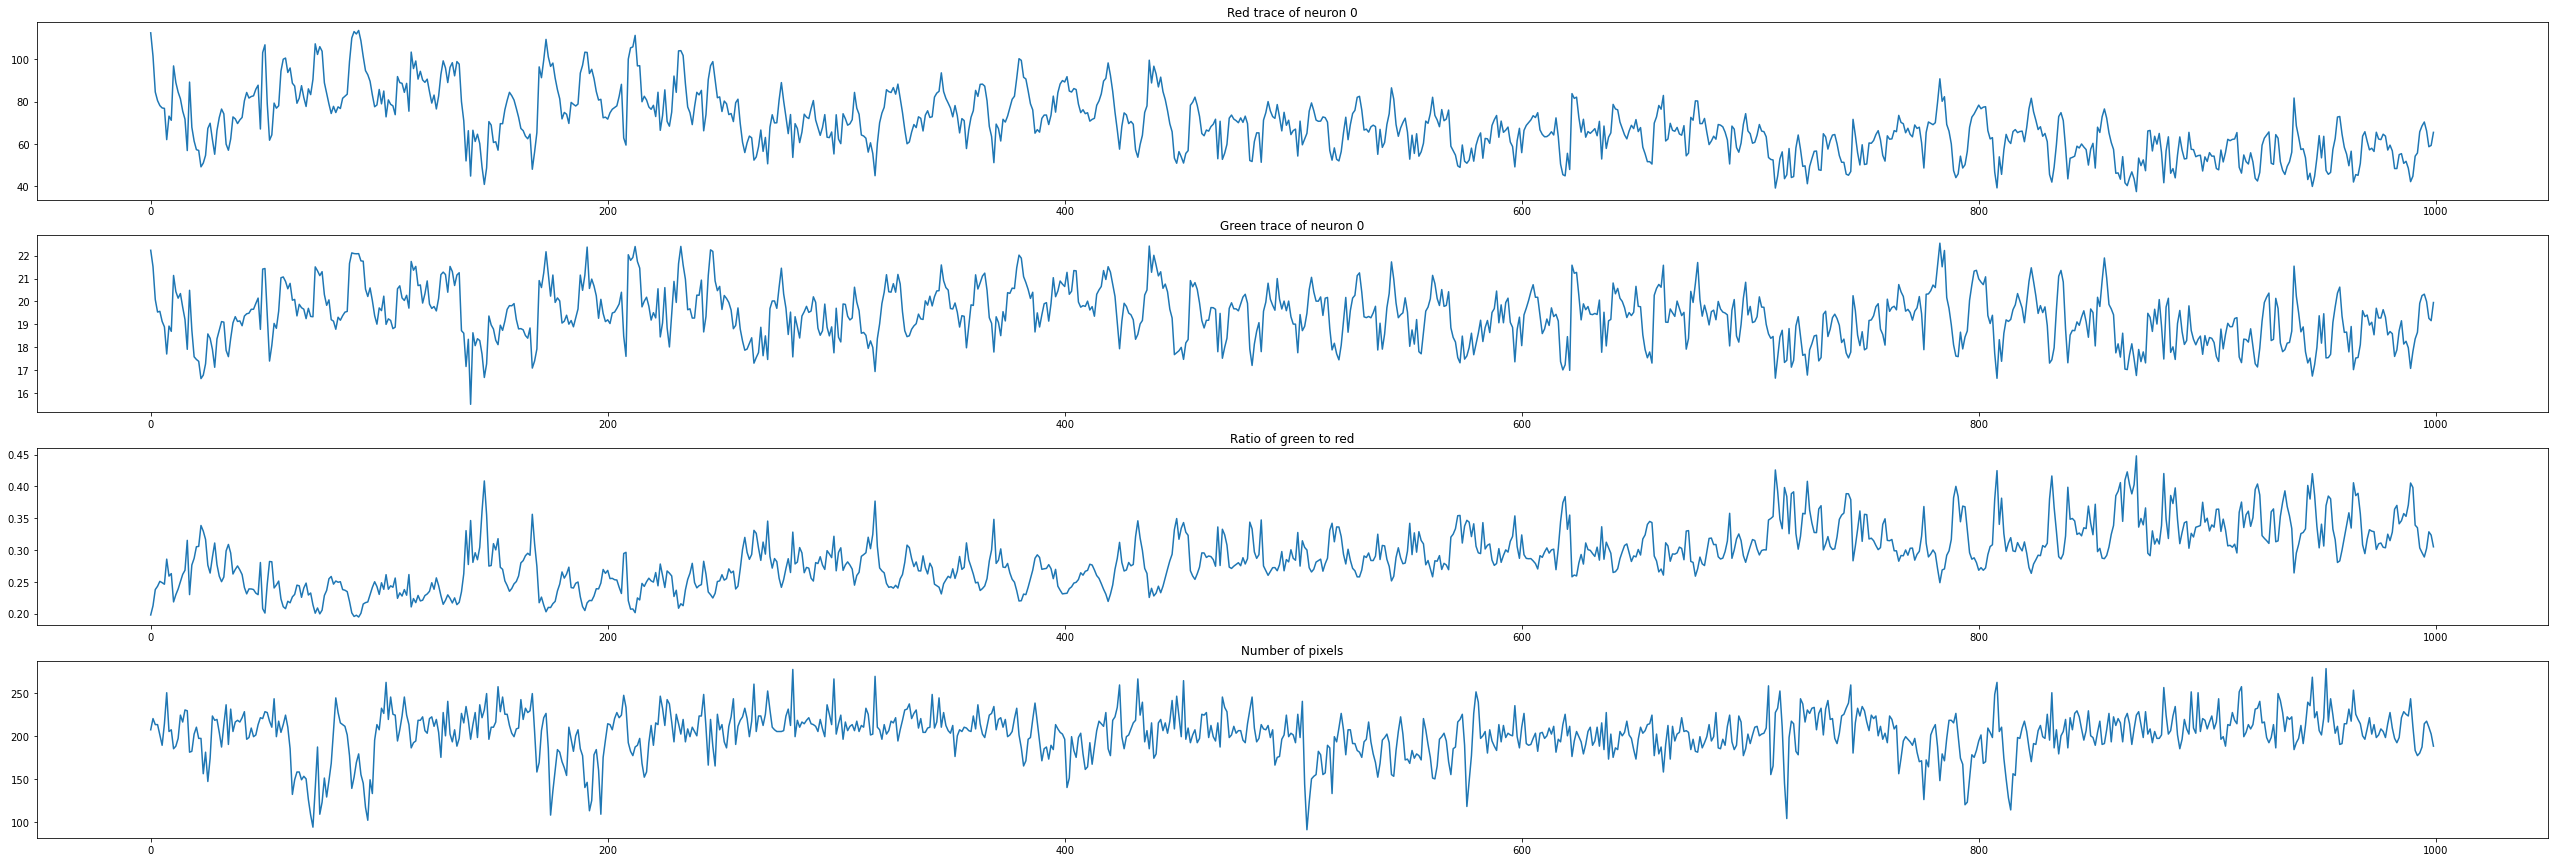

In [127]:
fig, axes = plt.subplots(4,1,figsize=(45,15))
ax = np.ravel(axes)

ax[0].plot(trace_red)
ax[0].set_title(f'Red trace of neuron {which_neuron}')

ax[1].plot(trace_green)
ax[1].set_title(f'Green trace of neuron {which_neuron}')

ax[2].plot(trace_green/trace_red)
ax[2].set_title('Ratio of green to red')

ax[3].plot(num_pixels)
ax[3].set_title(f'Number of pixels')

In [238]:
_plot_video_crop_trace(proj,
                      0,
                      num_frames,
                      video_dat,
                      cropped_dat_green,
                      cropped_dat_red,
                      trace_green/trace_red)

interactive(children=(IntSlider(value=24, description='t', max=49), IntSlider(value=3, description='z', max=6)…

<function DLC_for_WBFM.utils.visualization.plot_context_utils._plot_video_crop_trace.<locals>.<lambda>(t, z)>

## Tests when more than one neuron is in a cube

In [250]:
# Use the project config file
from DLC_for_WBFM.bin.configuration_definition import *
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import _get_crop_from_ometiff_virtual
from cellpose import models
from cellpose import utils as cellutils
from DLC_for_WBFM.utils.visualization.plot_context_utils import _plot_video_crop_trace
import imageio
from DLC_for_WBFM.utils.postprocessing.cellpose_utils import *


%load_ext autoreload
%autoreload 2

fname = 'test_project.pickle'
proj = load_config(fname)
# proj = pickle.load(open(fname, 'rb'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
# Read in a small cube
which_neuron = 5
num_frames = 100

cropped_dat_red = _get_crop_from_ometiff_virtual(fname,
                                   which_neuron=which_neuron,
                                   num_frames=num_frames,
                                                use_red_channel=True)


cropped_dat_green = _get_crop_from_ometiff_virtual(fname,
                                   which_neuron=which_neuron,
                                   num_frames=num_frames,
                                                use_red_channel=False)

Cropping 7 slices, starting at 8
Full size read as (700, 900)
Page 3308/3300; volume 0/100 to cropped array slice 0
Page 3309/3300; volume 0/100 to cropped array slice 1
Page 3310/3300; volume 0/100 to cropped array slice 2
Page 3311/3300; volume 0/100 to cropped array slice 3
Page 3312/3300; volume 0/100 to cropped array slice 4
Page 3313/3300; volume 0/100 to cropped array slice 5
Page 3314/3300; volume 0/100 to cropped array slice 6
Page 3341/3300; volume 1/100 to cropped array slice 0
Page 3342/3300; volume 1/100 to cropped array slice 1
Page 3343/3300; volume 1/100 to cropped array slice 2
Page 3344/3300; volume 1/100 to cropped array slice 3
Page 3345/3300; volume 1/100 to cropped array slice 4
Page 3346/3300; volume 1/100 to cropped array slice 5
Page 3347/3300; volume 1/100 to cropped array slice 6
Page 3374/3300; volume 2/100 to cropped array slice 0
Page 3375/3300; volume 2/100 to cropped array slice 1
Page 3376/3300; volume 2/100 to cropped array slice 2
Page 3377/3300; volu

Page 4105/3300; volume 24/100 to cropped array slice 5
Page 4106/3300; volume 24/100 to cropped array slice 6
Page 4133/3300; volume 25/100 to cropped array slice 0
Page 4134/3300; volume 25/100 to cropped array slice 1
Page 4135/3300; volume 25/100 to cropped array slice 2
Page 4136/3300; volume 25/100 to cropped array slice 3
Page 4137/3300; volume 25/100 to cropped array slice 4
Page 4138/3300; volume 25/100 to cropped array slice 5
Page 4139/3300; volume 25/100 to cropped array slice 6
Page 4166/3300; volume 26/100 to cropped array slice 0
Page 4167/3300; volume 26/100 to cropped array slice 1
Page 4168/3300; volume 26/100 to cropped array slice 2
Page 4169/3300; volume 26/100 to cropped array slice 3
Page 4170/3300; volume 26/100 to cropped array slice 4
Page 4171/3300; volume 26/100 to cropped array slice 5
Page 4172/3300; volume 26/100 to cropped array slice 6
Page 4199/3300; volume 27/100 to cropped array slice 0
Page 4200/3300; volume 27/100 to cropped array slice 1
Page 4201/

Page 4928/3300; volume 49/100 to cropped array slice 3
Page 4929/3300; volume 49/100 to cropped array slice 4
Page 4930/3300; volume 49/100 to cropped array slice 5
Page 4931/3300; volume 49/100 to cropped array slice 6
Page 4958/3300; volume 50/100 to cropped array slice 0
Page 4959/3300; volume 50/100 to cropped array slice 1
Page 4960/3300; volume 50/100 to cropped array slice 2
Page 4961/3300; volume 50/100 to cropped array slice 3
Page 4962/3300; volume 50/100 to cropped array slice 4
Page 4963/3300; volume 50/100 to cropped array slice 5
Page 4964/3300; volume 50/100 to cropped array slice 6
Page 4991/3300; volume 51/100 to cropped array slice 0
Page 4992/3300; volume 51/100 to cropped array slice 1
Page 4993/3300; volume 51/100 to cropped array slice 2
Page 4994/3300; volume 51/100 to cropped array slice 3
Page 4995/3300; volume 51/100 to cropped array slice 4
Page 4996/3300; volume 51/100 to cropped array slice 5
Page 4997/3300; volume 51/100 to cropped array slice 6
Page 5024/

Page 5754/3300; volume 74/100 to cropped array slice 4
Page 5755/3300; volume 74/100 to cropped array slice 5
Page 5756/3300; volume 74/100 to cropped array slice 6
Page 5783/3300; volume 75/100 to cropped array slice 0
Page 5784/3300; volume 75/100 to cropped array slice 1
Page 5785/3300; volume 75/100 to cropped array slice 2
Page 5786/3300; volume 75/100 to cropped array slice 3
Page 5787/3300; volume 75/100 to cropped array slice 4
Page 5788/3300; volume 75/100 to cropped array slice 5
Page 5789/3300; volume 75/100 to cropped array slice 6
Page 5816/3300; volume 76/100 to cropped array slice 0
Page 5817/3300; volume 76/100 to cropped array slice 1
Page 5818/3300; volume 76/100 to cropped array slice 2
Page 5819/3300; volume 76/100 to cropped array slice 3
Page 5820/3300; volume 76/100 to cropped array slice 4
Page 5821/3300; volume 76/100 to cropped array slice 5
Page 5822/3300; volume 76/100 to cropped array slice 6
Page 5849/3300; volume 77/100 to cropped array slice 0
Page 5850/

Page 6576/3300; volume 99/100 to cropped array slice 1
Page 6577/3300; volume 99/100 to cropped array slice 2
Page 6578/3300; volume 99/100 to cropped array slice 3
Page 6579/3300; volume 99/100 to cropped array slice 4
Page 6580/3300; volume 99/100 to cropped array slice 5
Page 6581/3300; volume 99/100 to cropped array slice 6
Cropping 7 slices, starting at 8
Full size read as (700, 900)
Page 3308/3300; volume 0/100 to cropped array slice 0
Page 3309/3300; volume 0/100 to cropped array slice 1
Page 3310/3300; volume 0/100 to cropped array slice 2
Page 3311/3300; volume 0/100 to cropped array slice 3
Page 3312/3300; volume 0/100 to cropped array slice 4
Page 3313/3300; volume 0/100 to cropped array slice 5
Page 3314/3300; volume 0/100 to cropped array slice 6
Page 3341/3300; volume 1/100 to cropped array slice 0
Page 3342/3300; volume 1/100 to cropped array slice 1
Page 3343/3300; volume 1/100 to cropped array slice 2
Page 3344/3300; volume 1/100 to cropped array slice 3
Page 3345/3300

Page 4133/3300; volume 25/100 to cropped array slice 0
Page 4134/3300; volume 25/100 to cropped array slice 1
Page 4135/3300; volume 25/100 to cropped array slice 2
Page 4136/3300; volume 25/100 to cropped array slice 3
Page 4137/3300; volume 25/100 to cropped array slice 4
Page 4138/3300; volume 25/100 to cropped array slice 5
Page 4139/3300; volume 25/100 to cropped array slice 6
Page 4166/3300; volume 26/100 to cropped array slice 0
Page 4167/3300; volume 26/100 to cropped array slice 1
Page 4168/3300; volume 26/100 to cropped array slice 2
Page 4169/3300; volume 26/100 to cropped array slice 3
Page 4170/3300; volume 26/100 to cropped array slice 4
Page 4171/3300; volume 26/100 to cropped array slice 5
Page 4172/3300; volume 26/100 to cropped array slice 6
Page 4199/3300; volume 27/100 to cropped array slice 0
Page 4200/3300; volume 27/100 to cropped array slice 1
Page 4201/3300; volume 27/100 to cropped array slice 2
Page 4202/3300; volume 27/100 to cropped array slice 3
Page 4203/

Page 4930/3300; volume 49/100 to cropped array slice 5
Page 4931/3300; volume 49/100 to cropped array slice 6
Page 4958/3300; volume 50/100 to cropped array slice 0
Page 4959/3300; volume 50/100 to cropped array slice 1
Page 4960/3300; volume 50/100 to cropped array slice 2
Page 4961/3300; volume 50/100 to cropped array slice 3
Page 4962/3300; volume 50/100 to cropped array slice 4
Page 4963/3300; volume 50/100 to cropped array slice 5
Page 4964/3300; volume 50/100 to cropped array slice 6
Page 4991/3300; volume 51/100 to cropped array slice 0
Page 4992/3300; volume 51/100 to cropped array slice 1
Page 4993/3300; volume 51/100 to cropped array slice 2
Page 4994/3300; volume 51/100 to cropped array slice 3
Page 4995/3300; volume 51/100 to cropped array slice 4
Page 4996/3300; volume 51/100 to cropped array slice 5
Page 4997/3300; volume 51/100 to cropped array slice 6
Page 5024/3300; volume 52/100 to cropped array slice 0
Page 5025/3300; volume 52/100 to cropped array slice 1
Page 5026/

Page 5751/3300; volume 74/100 to cropped array slice 1
Page 5752/3300; volume 74/100 to cropped array slice 2
Page 5753/3300; volume 74/100 to cropped array slice 3
Page 5754/3300; volume 74/100 to cropped array slice 4
Page 5755/3300; volume 74/100 to cropped array slice 5
Page 5756/3300; volume 74/100 to cropped array slice 6
Page 5783/3300; volume 75/100 to cropped array slice 0
Page 5784/3300; volume 75/100 to cropped array slice 1
Page 5785/3300; volume 75/100 to cropped array slice 2
Page 5786/3300; volume 75/100 to cropped array slice 3
Page 5787/3300; volume 75/100 to cropped array slice 4
Page 5788/3300; volume 75/100 to cropped array slice 5
Page 5789/3300; volume 75/100 to cropped array slice 6
Page 5816/3300; volume 76/100 to cropped array slice 0
Page 5817/3300; volume 76/100 to cropped array slice 1
Page 5818/3300; volume 76/100 to cropped array slice 2
Page 5819/3300; volume 76/100 to cropped array slice 3
Page 5820/3300; volume 76/100 to cropped array slice 4
Page 5821/

Page 6511/3300; volume 97/100 to cropped array slice 2
Page 6512/3300; volume 97/100 to cropped array slice 3
Page 6513/3300; volume 97/100 to cropped array slice 4
Page 6514/3300; volume 97/100 to cropped array slice 5
Page 6515/3300; volume 97/100 to cropped array slice 6
Page 6542/3300; volume 98/100 to cropped array slice 0
Page 6543/3300; volume 98/100 to cropped array slice 1
Page 6544/3300; volume 98/100 to cropped array slice 2
Page 6545/3300; volume 98/100 to cropped array slice 3
Page 6546/3300; volume 98/100 to cropped array slice 4
Page 6547/3300; volume 98/100 to cropped array slice 5
Page 6548/3300; volume 98/100 to cropped array slice 6
Page 6575/3300; volume 99/100 to cropped array slice 0
Page 6576/3300; volume 99/100 to cropped array slice 1
Page 6577/3300; volume 99/100 to cropped array slice 2
Page 6578/3300; volume 99/100 to cropped array slice 3
Page 6579/3300; volume 99/100 to cropped array slice 4
Page 6580/3300; volume 99/100 to cropped array slice 5
Page 6581/

In [243]:
# cropped_dat.shape
# cropped_img = np.squeeze(cropped_dat[0,...])

diameter = 8
channels = [0,0]
model = models.Cellpose(gpu=False, model_type='nuclei')


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [244]:
# Get time series of segmentations
all_multi_masks = []

for i in range(num_frames):
    this_vol = np.squeeze(cropped_dat_red[i,...])
    m, f, s, d = model.eval(this_vol, diameter=diameter, channels=channels, do_3D=True)
    
    print(f"{i}/{num_frames}")
    all_multi_masks.append(m)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.16s
dynamics computed 4.16s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
0/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
1/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
2/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
3/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.02s
masks computed 4.05s
estimated masks for 1 image(s) in 4.08 sec
>>>> TOTAL TIME 4.08 sec
4/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.22 sec
5/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 3.99s
dynamics computed 4.00s
masks computed 4.04s
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec
6/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.27s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
7/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.11 sec
8/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.13s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
9/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
10/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
11/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.19s
dynamics computed 4.19s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
12/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
13/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
14/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
15/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
16/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
17/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]


flows computed 4.13s
dynamics computed 4.13s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
18/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
19/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 3.99s
dynamics computed 3.99s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
20/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.17 sec
21/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
22/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
23/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
24/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
25/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.13s
dynamics computed 4.13s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
26/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.11s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.14 sec
27/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
28/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.11s
dynamics computed 4.11s
masks computed 4.14s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
29/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
30/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
31/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
32/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.03s
dynamics computed 4.04s
masks computed 4.07s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.10 sec
33/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.08s
estimated masks for 1 image(s) in 4.10 sec
>>>> TOTAL TIME 4.11 sec
34/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.09s
estimated masks for 1 image(s) in 4.12 sec
>>>> TOTAL TIME 4.12 sec
35/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
36/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.20 sec
37/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.14s
dynamics computed 4.14s
masks computed 4.21s
estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
38/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.12it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
39/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.07s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.12 sec
40/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
41/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
42/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.11s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
43/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.07s
dynamics computed 4.07s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
44/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.60it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.19s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
45/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]


flows computed 4.07s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
46/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.97it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.17s
estimated masks for 1 image(s) in 4.21 sec
>>>> TOTAL TIME 4.21 sec
47/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.00s
dynamics computed 4.01s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
48/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.09it/s]


flows computed 4.45s
dynamics computed 4.45s
masks computed 4.52s
estimated masks for 1 image(s) in 4.54 sec
>>>> TOTAL TIME 4.54 sec
49/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
50/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
51/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.02s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
52/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.12s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.16 sec
53/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.13s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
54/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.06s
dynamics computed 4.06s
masks computed 4.09s
estimated masks for 1 image(s) in 4.11 sec
>>>> TOTAL TIME 4.11 sec
55/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.01s
dynamics computed 4.01s
masks computed 4.06s
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.09 sec
56/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.18s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
57/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
58/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.09s
dynamics computed 4.09s
masks computed 4.29s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.30 sec
>>>> TOTAL TIME 4.30 sec
59/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


flows computed 4.05s
dynamics computed 4.06s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
60/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]


flows computed 4.18s
dynamics computed 4.18s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
61/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.23s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.24 sec
>>>> TOTAL TIME 4.24 sec
62/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]


flows computed 4.03s
dynamics computed 4.04s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
63/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.08s
dynamics computed 4.09s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
64/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
65/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
66/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
67/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.97it/s]


flows computed 4.03s
dynamics computed 4.03s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.28s
estimated masks for 1 image(s) in 4.29 sec
>>>> TOTAL TIME 4.29 sec
68/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.12s
estimated masks for 1 image(s) in 4.14 sec
>>>> TOTAL TIME 4.14 sec
69/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.11s
masks computed 4.15s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
70/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.09s
dynamics computed 4.09s
masks computed 4.16s
estimated masks for 1 image(s) in 4.18 sec
>>>> TOTAL TIME 4.18 sec
71/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.05s
dynamics computed 4.06s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
72/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


flows computed 4.01s
dynamics computed 4.02s
masks computed 4.21s

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.23 sec
73/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.06s
dynamics computed 4.07s
masks computed 4.23s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
74/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


flows computed 4.11s
dynamics computed 4.12s


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

masks computed 4.31s
estimated masks for 1 image(s) in 4.33 sec
>>>> TOTAL TIME 4.33 sec
75/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.53it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.22s
estimated masks for 1 image(s) in 4.25 sec
>>>> TOTAL TIME 4.25 sec
76/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.20s
estimated masks for 1 image(s) in 4.23 sec
>>>> TOTAL TIME 4.23 sec
77/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.04s
dynamics computed 4.04s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
78/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


flows computed 4.14s
dynamics computed 4.14s
masks computed 4.24s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
79/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


flows computed 4.04s
dynamics computed 4.05s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
80/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.52it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.17s
estimated masks for 1 image(s) in 4.19 sec
>>>> TOTAL TIME 4.19 sec
81/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


flows computed 4.02s
dynamics computed 4.02s
masks computed 4.13s
estimated masks for 1 image(s) in 4.15 sec
>>>> TOTAL TIME 4.15 sec
82/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


flows computed 4.06s
dynamics computed 4.06s
masks computed 4.22s
estimated masks for 1 image(s) in 4.26 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.26 sec
83/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.83it/s]


flows computed 4.03s
dynamics computed 4.03s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.22 sec
84/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.10s
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.13 sec
85/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]


flows computed 4.01s
dynamics computed 4.01s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
86/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.02s
dynamics computed 4.03s
masks computed 4.14s
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
87/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.10s
dynamics computed 4.10s
masks computed 4.18s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
88/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.08s
dynamics computed 4.08s
masks computed 4.15s
estimated masks for 1 image(s) in 4.17 sec
>>>> TOTAL TIME 4.17 sec
89/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.58it/s]


flows computed 4.07s
dynamics computed 4.07s
masks computed 4.25s
estimated masks for 1 image(s) in 4.26 sec

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


>>>> TOTAL TIME 4.26 sec
90/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.28 sec
91/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


flows computed 4.08s
dynamics computed 4.08s
masks computed 4.17s
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
92/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.25s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
93/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.12s
dynamics computed 4.12s
masks computed 4.20s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
94/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.19s
dynamics computed 4.20s
masks computed 4.23s
estimated masks for 1 image(s) in 4.26 sec
>>>> TOTAL TIME 4.26 sec
95/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

flows computed 4.15s
dynamics computed 4.15s
masks computed 4.19s
estimated masks for 1 image(s) in 4.22 sec
>>>> TOTAL TIME 4.22 sec
96/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.46it/s]


flows computed 4.12s
dynamics computed 4.12s
masks computed 4.25s
estimated masks for 1 image(s) in 4.28 sec
>>>> TOTAL TIME 4.28 sec
97/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]


flows computed 4.15s
dynamics computed 4.15s
masks computed 4.28s
estimated masks for 1 image(s) in 4.31 sec
>>>> TOTAL TIME 4.32 sec
98/100
processing 1 image(s)
multi-stack tiff read in as having 7 planes 1 channels

 running YX: 7 planes of size (19, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZY: 19 planes of size (7, 19) 




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


 running ZX: 19 planes of size (7, 19) 




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.85it/s]

flows computed 4.11s
dynamics computed 4.12s
masks computed 4.24s
estimated masks for 1 image(s) in 4.27 sec
>>>> TOTAL TIME 4.27 sec
99/100


In [245]:
trace_red = np.zeros(num_frames)
trace_green = np.zeros(num_frames)
num_pixels = np.zeros(num_frames)

for i, m in enumerate(all_multi_masks):
    this_vol_red = np.squeeze(cropped_dat_red[i,...])
    this_vol_green = np.squeeze(cropped_dat_green[i,...])
    # Assume there is only one neuron detected
    trace_red[i] = brightness_from_roi(this_vol_red, m, 1)
    trace_green[i] = brightness_from_roi(this_vol_green, m, 1)
    num_pixels[i] = np.count_nonzero(m)

C:\Users\charles.fieseler\Anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\charles.fieseler\Anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [246]:
print(len(all_multi_masks))
all_multi_masks[1].shape

100


(7, 19, 19)

In [236]:
brightness_from_roi(cropped_dat_red[0,...], all_masks[0], 1)

73.61538461538461

In [259]:
initial_neuron, _ = calc_center_neuron(all_multi_masks[0])

all_neurons, all_overlaps, all_masks = calc_all_overlaps(initial_neuron,all_multi_masks)

Best Neuron: 1, overlap between 96 and original
Best Neuron: 2, overlap between 115 and original
Best Neuron: 2, overlap between 78 and original
Best Neuron: 2, overlap between 103 and original
Best Neuron: 1, overlap between 114 and original
Best Neuron: 1, overlap between 135 and original
Best Neuron: 2, overlap between 119 and original
Best Neuron: 2, overlap between 55 and original
Best Neuron: 1, overlap between 37 and original
Best Neuron: 2, overlap between 48 and original
Best Neuron: 2, overlap between 65 and original
Best Neuron: 2, overlap between 29 and original
Best Neuron: 2, overlap between 21 and original
Best Neuron: None, overlap between 0 and original
Lost neuron tracking, attempting to find...
New Object size (38) was too different (119); rejecting
Best Neuron: 3, overlap between 46 and original
Best Neuron: None, overlap between 0 and original
Lost neuron tracking, attempting to find...
Re-found neuron!
Best Neuron: None, overlap between 0 and original
Lost neuron 

In [260]:
# This function is designed to work with 2d slices
outlines_over_time = []
for mask_one_vol in all_multi_masks:
    outlines_over_time.append([cellutils.outlines_list(single_slice_mask) for single_slice_mask in mask_one_vol])


In [263]:
# plot image with outlines overlaid in red
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(z, t):
    fig, ax = plt.subplots(1,3,figsize=(45, 15))
#     ax = axes.ravel()
    
    # Plot raw data
    ax[0].imshow(cropped_dat_red[t,z,...])
    for o in outlines_over_time[t][z]:
        ax[0].plot(o[:,0], o[:,1], color='r')
    ax[0].set_title(f'Slice {z}, Time {t}')
    
    # Plot raw data
    ax[1].imshow(cropped_dat_green[t,z,...])
    for o in outlines_over_time[t][z]:
        ax[1].plot(o[:,0], o[:,1], color='r')
    ax[1].set_title(f'Slice {z}, Time {t}')
    
    # Plot the ID'ed neuron
    ax[2].imshow(all_masks[t][z,...])
    ax[2].set_title(f'Found neuron: {all_neurons[t]}')
    
    
interact(f, z=(0,cropped_img.shape[0]-1), t=(0,num_frames-1));

interactive(children=(IntSlider(value=3, description='z', max=6), IntSlider(value=49, description='t', max=99)…

Text(0.5, 1.0, 'Number of pixels')

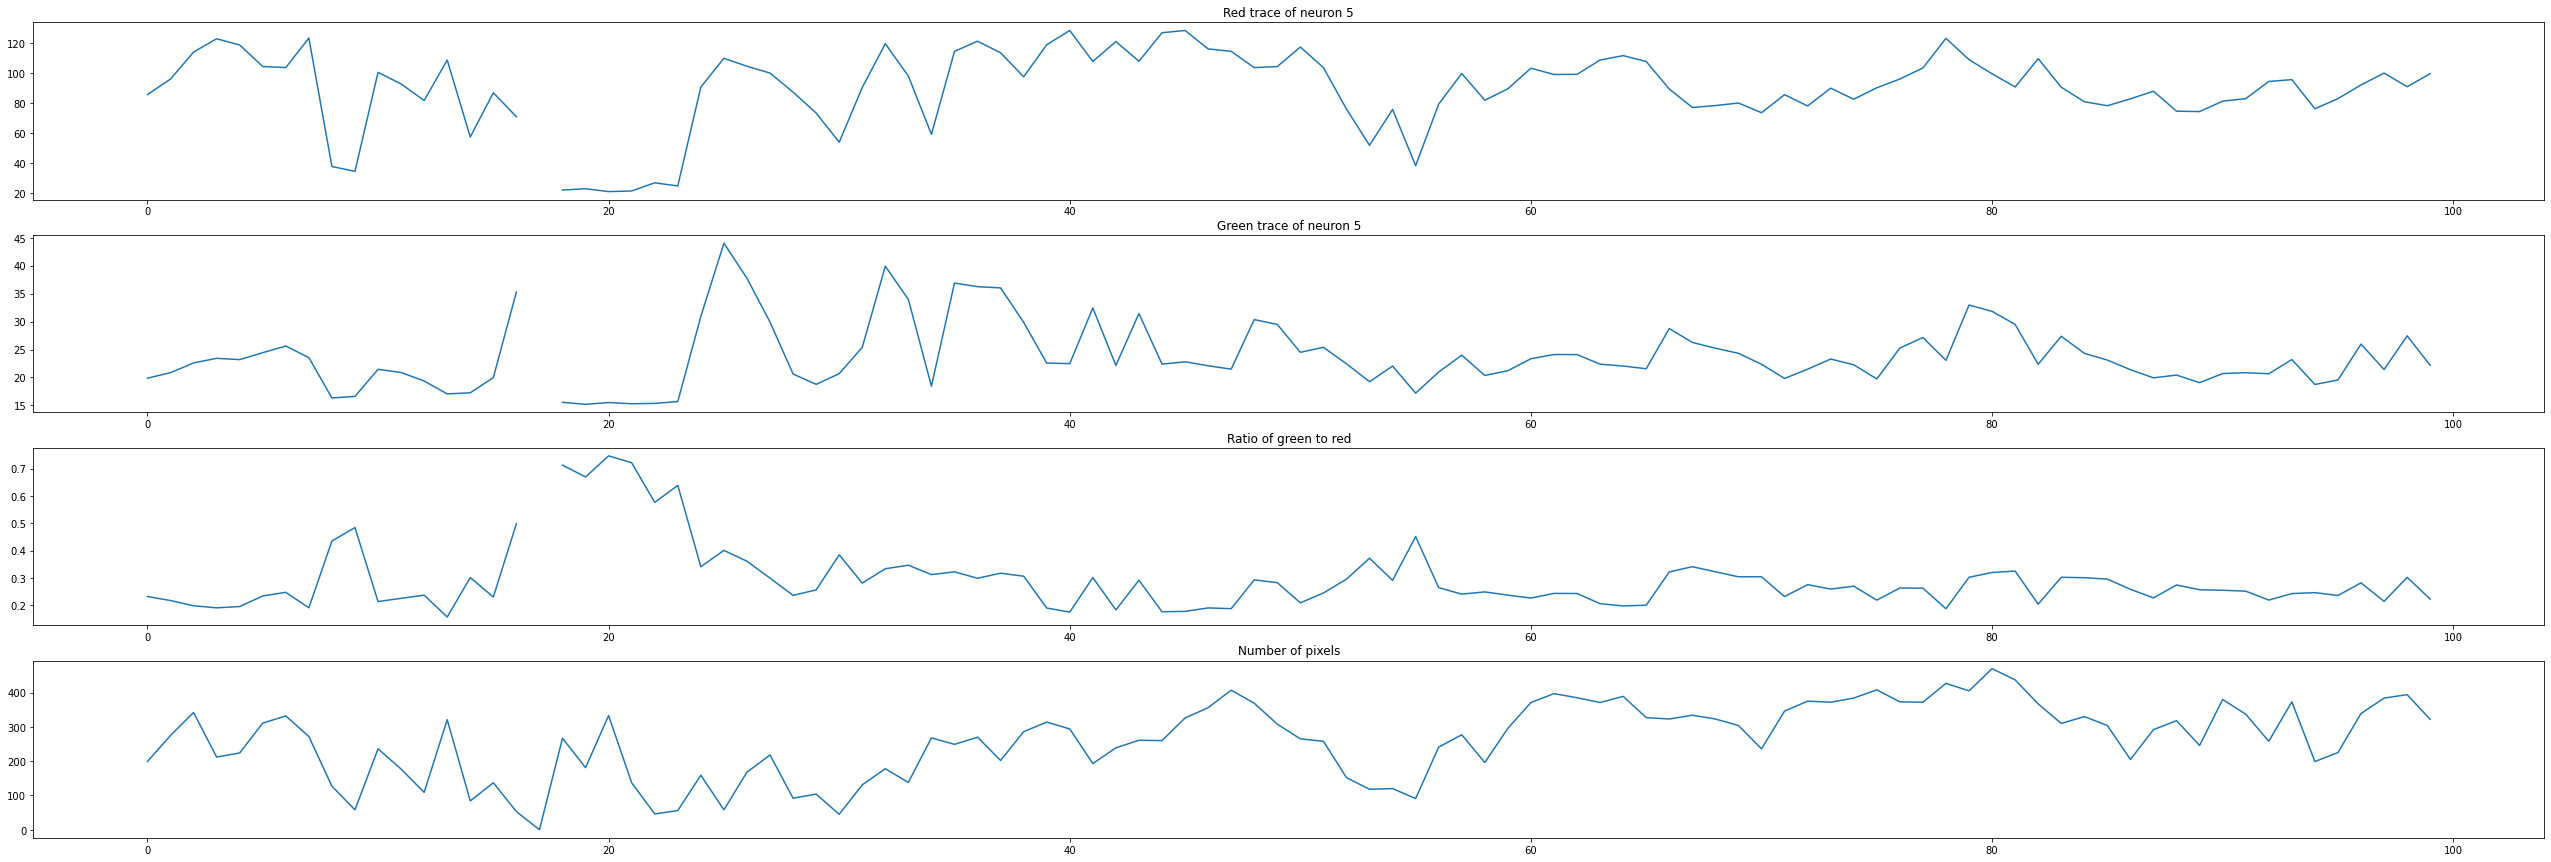

In [264]:
fig, axes = plt.subplots(4,1,figsize=(45,15))
ax = np.ravel(axes)

ax[0].plot(trace_red)
ax[0].set_title(f'Red trace of neuron {which_neuron}')

ax[1].plot(trace_green)
ax[1].set_title(f'Green trace of neuron {which_neuron}')

ax[2].plot(trace_green/trace_red)
ax[2].set_title('Ratio of green to red')

ax[3].plot(num_pixels)
ax[3].set_title(f'Number of pixels')

# FAILED Bokeh tests

In [84]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

# Initialize
# Interactive images: https://discourse.bokeh.org/t/possible-to-update-a-image-rgba-on-change-of-a-widget/1978
source = ColumnDataSource({'image': [img]})
sz = img[0].shape
p = figure(title="image", plot_height=sz[0], plot_width=sz[1])
tmp = p.image(image=[img[15,...]], x=[0], y=[0], dw=[sz[1]], dh=[sz[0]])
# tmp = p.image(image='image', x=0, y=0, dw=100, dh=100, source=source)

def update(z=15):
    tmp.data_source.data['image'] = [img[z,...]]
    for o in outlines[z]:
        if len(o)>0:
            p.line(o[:,1], o[:,0], color='red')
            break
    print("finished plotting dots")
    push_notebook()
    
show(p, notebook_handle=True)
# show(p)

interact(update, z=(0,img.shape[0]-1))


interactive(children=(IntSlider(value=15, description='z', max=32), Output()), _dom_classes=('widget-interact'…

<function __main__.update(z=15)>

In [76]:
%debug

> <ipython-input-75-bbc236cc93cf>(16)update()
     14 #         p.circle([o[:,0]], [o[:,1]], size=0.1, color='r')
     15 #         p.scatter([o[:,0]], [o[:,1]], size=100, color='red')
---> 16         p.scatter([o[0,0]], [o[0,1]], size=100, color='red')
     17     print("finished plotting dots")
     18     push_notebook()

ipdb> o
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z]
[array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([[326, 293],
       [325, 294],
       [324, 295],
       [324, 296],
       [324, 297],
       [324, 298],
       [324, 299],
       [325, 300],
       [326, 301],
       [327, 301],
       [328, 300],
       [329, 299],
       [329, 298],
       [330, 297],
       [329, 296],
       [329, 295],
       [329, 294],
       [328, 293],
       [327, 293]]), array([], shape=(0, 2), dtype=float64), array([[231, 334],
       [231, 335],
      

ipdb> outlines[z][0]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][1]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][3]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][10]
array([[295, 308],
       [295, 309],
       [294, 310],
       [294, 311],
       [293, 312],
       [293, 313],
       [293, 314],
       [293, 315],
       [294, 316],
       [295, 317],
       [296, 317],
       [297, 316],
       [298, 315],
       [298, 314],
       [299, 313],
       [299, 312],
       [299, 311],
       [300, 310],
       [301, 310],
       [302, 309],
       [303, 309],
       [304, 310],
       [304, 309],
       [304, 308],
       [303, 308],
       [302, 308],
       [301, 308],
       [300, 309],
       [299, 309],
       [298, 309],
       [297, 309],
       [296, 309]])
ipdb> q


## Bokeh tests

In [20]:
import numpy as np

from bokeh.plotting import figure, output_file, show

N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.x_range.range_padding = p.y_range.range_padding = 0

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11", level="image")
p.grid.grid_line_width = 0.5

output_file("image.html", title="image.py example")

show(p)

In [38]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# create an array of RGBA data
N = 20
img2 = np.empty((N, N), dtype=np.uint32)
view = img2.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(255 * i / N)
        view[i, j, 1] = 158
        view[i, j, 2] = int(255 * j / N)
        view[i, j, 3] = 255

reset_output()
output_notebook()

p = figure()

p.image_rgba(image=[img2], x=[0], y=[0], dw=[10], dh=[10])

show(p)

Loading BokehJS ...

In [41]:
img2.dtype

dtype('uint32')

In [7]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook, reset_output
from bokeh.plotting import figure

reset_output()
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
show(p, notebook_handle=True)

interact(update, f=["sin", "cos"], w=(0,50), A=(-10,10), phi=(0, 20, 0.1))

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>